In [1]:
# !unzip mmwave-data.zip

In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import special as sp
from scipy.stats import gaussian_kde
from scipy.io import loadmat
from sklearn.neighbors import KernelDensity
from scipy import special as sp
import warnings
warnings.filterwarnings('ignore')

# Data Load

## Small Scale Fading Data 

In [3]:
def SSF_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathAB_2KHz/pathAB_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_dB_mmdata_pathBA_2KHz/pathBA_SSF_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def SSF_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathAB_2KHz/pathAB_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/SSF_linear_mmdata_pathBA_2KHz/pathBA_SSF_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9


######################
#### LOAD PATH AB ####
######################
SSF_pathAB_dB = pd.DataFrame()
SSF_pathAB_dB['AP1'], SSF_pathAB_dB['AP2'], SSF_pathAB_dB['AP3'],\
 SSF_pathAB_dB['AP4'], SSF_pathAB_dB['AP5'], SSF_pathAB_dB['AP6'],\
  SSF_pathAB_dB['AP7'], SSF_pathAB_dB['AP8'], SSF_pathAB_dB['AP9'] = SSF_mmdata_dB('AB')

SSF_pathAB_linear = pd.DataFrame()
SSF_pathAB_linear['AP1'], SSF_pathAB_linear['AP2'], SSF_pathAB_linear['AP3'],\
 SSF_pathAB_linear['AP4'], SSF_pathAB_linear['AP5'], SSF_pathAB_linear['AP6'],\
  SSF_pathAB_linear['AP7'], SSF_pathAB_linear['AP8'], SSF_pathAB_linear['AP9'] = SSF_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
SSF_pathBA_dB = pd.DataFrame()
SSF_pathBA_dB['AP1'], SSF_pathBA_dB['AP2'], SSF_pathBA_dB['AP3'],\
 SSF_pathBA_dB['AP4'], SSF_pathBA_dB['AP5'], SSF_pathBA_dB['AP6'],\
  SSF_pathBA_dB['AP7'], SSF_pathBA_dB['AP8'], SSF_pathBA_dB['AP9'] = SSF_mmdata_dB('BA')

SSF_pathBA_linear = pd.DataFrame()
SSF_pathBA_linear['AP1'], SSF_pathBA_linear['AP2'], SSF_pathBA_linear['AP3'],\
 SSF_pathBA_linear['AP4'], SSF_pathBA_linear['AP5'], SSF_pathBA_linear['AP6'],\
  SSF_pathBA_linear['AP7'], SSF_pathBA_linear['AP8'], SSF_pathBA_linear['AP9'] = SSF_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(SSF_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(SSF_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(SSF_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(SSF_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-0.696300,-0.706977,-0.950157,-0.649444,-0.671172,-1.023778,-0.975409,-0.890574,-1.067207
std,3.827021,3.843941,4.345763,3.608783,3.657521,4.609185,4.428430,4.217900,4.628232
min,-28.257000,-26.160000,-30.613000,-26.990000,-29.916000,-29.998000,-27.744000,-24.949000,-26.882000
25%,-2.003200,-2.086100,-2.829525,-1.817875,-1.925500,-3.061450,-3.032250,-2.724975,-3.256600
50%,0.017756,-0.086271,-0.148310,-0.047697,-0.012861,-0.149310,-0.141100,-0.180765,-0.253520
75%,1.553000,1.488500,1.844975,1.316550,1.431450,1.974400,1.982550,1.821300,2.012050
max,8.209900,9.598300,9.200100,10.698000,9.334600,8.803300,9.140200,9.140100,9.516400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,0.998078,0.999170,0.994459,0.996652,0.996119,0.998034,0.996456,0.996790,0.996149
std,0.346952,0.361394,0.406651,0.340052,0.342458,0.428794,0.417400,0.402380,0.439500
min,0.038648,0.049204,0.029467,0.044717,0.031928,0.031630,0.041001,0.056568,0.045280
25%,0.794040,0.786490,0.721980,0.811160,0.801170,0.702955,0.705320,0.730723,0.687333
50%,1.002000,0.990120,0.983070,0.994525,0.998520,0.982960,0.983890,0.979400,0.971230
75%,1.195800,1.186900,1.236625,1.163675,1.179200,1.255200,1.256400,1.233275,1.260675
max,2.573300,3.019400,2.884100,3.426900,2.929100,2.755300,2.864200,2.864200,2.991000


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.141164,-1.154185,-1.201912,-1.197784,-1.120310,-1.244764,-1.132814,-1.108337,-1.219527
std,4.811502,4.821488,4.949272,4.950949,4.758712,5.050291,4.790806,4.782434,5.034982
min,-27.320000,-27.572000,-29.529000,-28.736000,-30.499000,-31.529000,-26.868000,-28.713000,-29.627000
25%,-3.625500,-3.761550,-3.749250,-3.664900,-3.414300,-3.908400,-3.468750,-3.467175,-3.835200
50%,-0.280440,-0.366350,-0.327530,-0.265050,-0.282530,-0.364120,-0.316615,-0.214105,-0.305010
75%,2.210025,2.240700,2.276500,2.249450,2.210200,2.357300,2.133950,2.137500,2.370900
max,10.524000,10.389000,10.315000,9.950700,9.385600,9.530000,10.148000,9.653300,10.109000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,0.997566,0.998390,0.998292,0.996041,0.994971,0.997650,0.996580,0.998705,0.999811
std,0.457868,0.468088,0.473801,0.460772,0.442697,0.477986,0.454135,0.453083,0.476423
min,0.043050,0.041821,0.033383,0.036578,0.029857,0.026520,0.045353,0.036673,0.033011
25%,0.658760,0.648515,0.649440,0.655775,0.674970,0.637650,0.670752,0.670878,0.643050
50%,0.968230,0.958700,0.962990,0.969950,0.968000,0.958950,0.964205,0.975650,0.965490
75%,1.289700,1.294300,1.299650,1.295600,1.289800,1.311800,1.278500,1.279025,1.313800
max,3.358700,3.307100,3.279200,3.144400,2.946300,2.995700,3.216800,3.038600,3.202300


## Composite (Small + Large) Scale Fading Data

In [4]:
def composite_mmdata_dB(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathAB_2KHz/pathAB_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_dB_mmdata_pathBA_2KHz/pathBA_composite_dB_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

def composite_mmdata_linear(path):   
  if path == 'AB':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathAB_2KHz/pathAB_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)
  elif path == 'BA':
    ap_1 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP1_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_2 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP2_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_3 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP3_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_4 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP4_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_5 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP5_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_6 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP6_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_7 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP7_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_8 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP8_downsampled2Khz_win100.txt', sep=" ", header=None)
    ap_9 = pd.read_csv('content/Composite_linear_mmdata_pathBA_2KHz/pathBA_composite_linear_AP9_downsampled2Khz_win100.txt', sep=" ", header=None)

  return ap_1, ap_2, ap_3, ap_4, ap_5, ap_6, ap_7, ap_8, ap_9

######################
#### LOAD PATH AB ####
######################
composite_pathAB_dB = pd.DataFrame()
composite_pathAB_dB['AP1'], composite_pathAB_dB['AP2'], composite_pathAB_dB['AP3'],\
 composite_pathAB_dB['AP4'], composite_pathAB_dB['AP5'], composite_pathAB_dB['AP6'],\
  composite_pathAB_dB['AP7'], composite_pathAB_dB['AP8'], composite_pathAB_dB['AP9'] = composite_mmdata_dB('AB')

composite_pathAB_linear = pd.DataFrame()
composite_pathAB_linear['AP1'], composite_pathAB_linear['AP2'], composite_pathAB_linear['AP3'],\
 composite_pathAB_linear['AP4'], composite_pathAB_linear['AP5'], composite_pathAB_linear['AP6'],\
  composite_pathAB_linear['AP7'], composite_pathAB_linear['AP8'], composite_pathAB_linear['AP9'] = composite_mmdata_linear('AB')


######################
#### LOAD PATH BA ####
######################
composite_pathBA_dB = pd.DataFrame()
composite_pathBA_dB['AP1'], composite_pathBA_dB['AP2'], composite_pathBA_dB['AP3'],\
 composite_pathBA_dB['AP4'], composite_pathBA_dB['AP5'], composite_pathBA_dB['AP6'],\
  composite_pathBA_dB['AP7'], composite_pathBA_dB['AP8'], composite_pathBA_dB['AP9'] = composite_mmdata_dB('BA')

composite_pathBA_linear = pd.DataFrame()
composite_pathBA_linear['AP1'], composite_pathBA_linear['AP2'], composite_pathBA_linear['AP3'],\
 composite_pathBA_linear['AP4'], composite_pathBA_linear['AP5'], composite_pathBA_linear['AP6'],\
  composite_pathBA_linear['AP7'], composite_pathBA_linear['AP8'], composite_pathBA_linear['AP9'] = composite_mmdata_linear('BA')

##########################
#### PRINT STATISTICS ####
##########################
print('Path AB (dB) Statistics:')
display(composite_pathAB_dB.describe())
print('Path AB (linear) Statistics:')
display(composite_pathAB_linear.describe())
print('Path BA (dB) Statistics:')
display(composite_pathBA_dB.describe())
print('Path BA (linear) Statistics:')
display(composite_pathBA_linear.describe())


Path AB (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,-1.331243,-2.026816,-2.148211,-1.354591,-1.358023,-1.965932,-1.867219,-2.455355,-2.377686
std,5.555703,5.295770,5.622319,5.555328,5.270987,6.592554,5.370040,4.979277,5.386154
min,-34.977000,-35.591000,-37.205000,-33.143000,-34.196000,-36.296000,-32.348000,-32.857000,-32.103000
25%,-4.141100,-4.725900,-5.285100,-4.408050,-4.099150,-5.727400,-4.738550,-4.891600,-5.360025
50%,-0.597460,-1.021800,-1.318900,-0.049510,-0.654870,-1.528100,-0.982990,-1.590450,-1.507750
75%,2.620200,1.610700,1.786325,2.748350,1.862300,2.231150,1.945700,0.924527,1.539700
max,12.562000,9.626500,10.084000,9.553500,11.060000,13.356000,11.339000,9.054900,8.569400


Path AB (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,21395.000000,17625.000000,21312.000000,19854.000000,18791.000000,17291.000000,18687.000000,18562.000000,18250.000000
mean,1.016877,0.921460,0.932225,1.008525,1.005849,1.035511,0.946677,0.863832,0.893894
std,0.547200,0.453448,0.513528,0.503199,0.564291,0.775473,0.486083,0.408087,0.462476
min,0.017830,0.016613,0.013796,0.022022,0.019507,0.015317,0.024133,0.022760,0.024821
25%,0.620790,0.580370,0.544185,0.602000,0.623795,0.517165,0.579525,0.569400,0.539513
50%,0.933530,0.889020,0.859125,0.994320,0.927380,0.838670,0.893000,0.832675,0.840645
75%,1.352150,1.203700,1.228300,1.372175,1.239150,1.292900,1.251050,1.112300,1.193975
max,4.247100,3.029200,3.193200,3.003800,3.572700,4.653600,3.689400,2.836300,2.682100


Path BA (dB) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,-1.478477,-1.796911,-1.697986,-1.304056,-1.382989,-1.228730,-1.269627,-1.546466,-1.263962
std,5.612589,5.461735,5.331014,5.664596,5.709885,5.531827,5.590528,6.177197,5.595894
min,-29.275000,-30.195000,-29.306000,-31.022000,-35.014000,-30.264000,-29.162000,-32.034000,-29.974000
25%,-4.688175,-4.909150,-4.600750,-4.491600,-4.574200,-4.335100,-4.386750,-5.096475,-4.449900
50%,-0.726485,-1.062800,-0.846180,-0.413770,-0.738970,-0.424370,-0.462455,-0.927085,-0.411740
75%,2.475750,2.116600,2.084900,2.743400,2.576700,2.746100,2.654150,2.612550,2.782800
max,13.313000,12.184000,11.274000,13.101000,11.902000,10.764000,12.810000,14.148000,13.559000


Path BA (linear) Statistics:


,AP1,AP2,AP3,AP4,AP5,AP6,AP7,AP8,AP9
count,20854.000000,20375.000000,19479.000000,20395.000000,19729.000000,20229.000000,20812.000000,19958.000000,20229.000000
mean,1.010464,0.963914,0.964883,1.029932,1.026995,1.030575,1.030587,1.047470,1.031002
std,0.577506,0.527819,0.503657,0.570421,0.595472,0.556338,0.572540,0.705591,0.566503
min,0.034377,0.030919,0.034252,0.028112,0.017754,0.030675,0.034824,0.025021,0.031717
25%,0.582895,0.568255,0.588795,0.596235,0.590590,0.607080,0.603480,0.556130,0.599110
50%,0.919760,0.884830,0.907180,0.953480,0.918440,0.952320,0.948150,0.898760,0.953700
75%,1.329775,1.275950,1.271300,1.371450,1.345300,1.371800,1.357425,1.350900,1.377700
max,4.630500,4.066500,3.661900,4.518900,3.936400,3.453000,4.370200,5.098000,4.763800


# Auxiliary Methods

In [5]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print("Toc: start time not set") 
        
# def KappaMuPDF(r, kappa, mu, omega):
#   '''
#   kappa-mu pdf.
#   '''
#   A = (2*mu * ((1 + kappa)**((mu+1)/2))) \
#           /(np.sqrt(omega) * (kappa**((mu-1)/2)) * np.exp(mu * kappa))
#   B = (r / np.sqrt(omega))**(mu)
#   C = np.exp(-mu*(1+kappa) * (r/np.sqrt(omega))**2)
#   D = sp.iv(mu-1, 2*mu * np.sqrt(kappa * (1+kappa)) * (r/np.sqrt(omega)))

#   pdf = A * B * C * D
#   return pdf

# def shadowedKappaMuPDF(r, kappa, mu, omega, md):
#   '''
#   shadowed kappa-mu pdf (type 1).
#   '''
#   A = 2 * r**((2*mu) -1) / omega**(mu)
#   B = (mu**mu * md**md * (1+kappa)**mu) / (sp.gamma(mu) * ((mu*kappa)+md)**md)
#   C = np.exp((- mu * (1+kappa) * r**2) / omega)
#   D = (mu**2) * kappa * (1+kappa) * (r**2)
#   E = ((mu*kappa)+md) * omega
#   F = sp.hyp1f1(md, mu, D / E)

#   pdf = A * B * C * F
#   return pdf

def shadowedKappaMuPDF_t2(r, kappa, mu, r_hat, ms):
  '''
  shadowed kappa-mu pdf (type 2).
  '''
  A = 2 * ( ( ms - 1 ) ** ( ms ) ) * ( r ** ( ( 2 * mu ) - 1 ) )  * ( r_hat ** ( 2 * ms ) ) * ( ( 1 + kappa ) ** mu) * ( mu ** mu )
  B = sp.beta(ms, mu ) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( ms - 1 + (kappa * mu) ) ) ) ** ( mu + ms ) )
  C = (ms+mu)/2
  D = (1+ms+mu)/2
  E = 4 * (mu**2) * kappa * (1 + kappa) * (r**2) * (r_hat**2)
  F = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( ms - 1 + (kappa * mu) ) ) )**2
  G = sp.hyp2f1( C, D, mu, E / F )

  pdf = (A/B)*G
  return pdf

# def shadowedKappaMuPDF_t3(r, kappa, mu, r_hat, mt):
#   '''
#   shadowed kappa-mu pdf (type 3).
#   '''
#   A = 2 * ( ( 1 + kappa ) ** mu) * ( mu ** mu ) * math.exp( -kappa * mu ) * ( ( (mt - 1) * ( r_hat ** 2 ) )**( mt ) ) * ( r ** ( ( 2 * mu ) - 1 ) )
#   B = sp.beta(mt, mu) * ( ( ( (r ** 2) * (1 + kappa) * mu ) + ( ( r_hat ** 2 ) * ( mt - 1 ) ) )**( mu + mt ) )
#   C = (mt+mu)
#   D = ( mu ** 2 ) * kappa * ( 1 + kappa ) * ( r**2)
#   E = ( ( (r**2) * (1 + kappa) * mu ) + ( ( r_hat**2 ) * ( mt - 1 ) ) )
#   F = sp.hyp1f1(C, mu, D/E )

#   pdf = (A/B)*F
#   return pdf

def kldiv(pVec1, pVec2):
  '''
  Kullback-Leibler divergence.
  '''
  KL = np.sum(pVec1*(np.log2(pVec1)-np.log2(pVec2)))
  return KL

def RAD(kldiv1, kldiv2):
  '''
  Resistor-Average Distance.
  '''
  RAD = 1/(1/kldiv1+1/kldiv2)
  return RAD


def fitness(X, Y, fitnessType, kappa, mu, omega):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Kappa Mu)
  '''
  if fitnessType == 'MSE':
    y_pred = KappaMuPDF(X, kappa, mu, omega)
    n = len(Y)
    cost = 1/n * sum(val**2 for val in (Y-y_pred))
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = KappaMuPDF(X, kappa, mu, omega)/np.sum(KappaMuPDF(X, kappa, mu, omega))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost

def getDensityEstimationSamples(linear_data, nExtractedSamples, path, nAP):
  '''
  Extracted KDE uniformly spaced samples from the data.
  '''
  Xdata = np.linspace(linear_data.min(), linear_data.max(), nExtractedSamples).reshape(-1, 1)
  kde = KernelDensity(kernel='gaussian', bandwidth=0.05).fit(linear_data.values.reshape(-1, 1))
  
  logkde = kde.score_samples(Xdata)
  Ydata = np.exp(logkde).reshape(-1,1)
  plt.figure(figsize=(10,7))
  plt.scatter(20*np.log10(Xdata), Ydata, c='magenta')
  plt.title(f'Path {path} | RX: {nAP}')
  plt.ylabel('Density')
  plt.xlabel('Small Scale Fading (dB)')
  plt.grid()
  plt.show()
  return Xdata, Ydata

def printSummary(path, nAP, fitnessType):
  print('='*30+'\n'+'Genetic Algorithm Fitting\nFitness Type: {}\nPath: {}\nRX: {}\n'.format(fitnessType, path, nAP))

def computeAIC(data, n, K, mle_sku, ga_sku_mse, ga_sku_rad):

    # AIC MLE - SHADOWED KAPPA MU T2
    sum = np.sum(np.log(shadowedKappaMuPDF_t2(data, mle_sku[0], mle_sku[1], mle_sku[2], mle_sku[3]).astype(float)))
    AIC_mle_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM SHADOWED KAPPA MU T2 - FITNESS: MSE
    sum = np.sum(np.log(shadowedKappaMuPDF_t2(data, ga_sku_mse[0], ga_sku_mse[1], ga_sku_mse[2], ga_sku_mse[3])))
    AIC_ga_shadowed_kappa_mu = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)

    # AIC GENETIC ALGORITHM SHADOWED KAPPA MU T2 - FITNESS: RAD
    sum = np.sum(np.log(shadowedKappaMuPDF_t2(data, ga_sku_rad[0], ga_sku_rad[1], ga_sku_rad[2], ga_sku_rad[3])))
    AIC_ga_shadowed_kappa_mu_rad = -2*sum + 2*K + (2*K*(K+1))/(n-K-1)


    rads = {'Methods':['MLE - Shad. KappaMu T2', 'GA - Shad. KappaMu T2 (Fitness = MSE)',\
                       'GA - Shad. KappaMu T2 (Fitness = RAD)'],
        'Akaike Information Criteria':[AIC_mle_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu, AIC_ga_shadowed_kappa_mu_rad]}
    
    df = pd.DataFrame(rads)
    display(df.sort_values(by='Akaike Information Criteria').reset_index(drop=True))
    
    return df

def plotResults(Xdata, Ydata, sku_pdf, ga_sku_mse, ga_sku_rad, path, nAP):
    
    if not os.path.exists('plots_skut2'):
        os.makedirs('plots_skut2')
    
    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), Ydata, c='black')
    plt.plot(20*np.log10(Xdata), sku_pdf, c='blue', label=r'Shad. $\kappa$-$\mu$ (Type 2) MLE')
    plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t2(Xdata, ga_sku_mse[0], ga_sku_mse[1], ga_sku_mse[2], ga_sku_mse[3]), label='GA: Shad. $\kappa$-$\mu$ (Type 2) (MSE)', c='red')
    plt.plot(20*np.log10(Xdata), shadowedKappaMuPDF_t2(Xdata, ga_sku_rad[0], ga_sku_rad[1], ga_sku_rad[2], ga_sku_rad[3]), label='GA: Shad. $\kappa$-$\mu$ (Type 2) (RAD)', c='green')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Composite Scale Fading (dB)')
    plt.ylabel('Density')
    plt.savefig('plots_skut2/sku-t2_path{}_ap{}.pdf'.format(path, nAP), dpi=150)
    plt.show()

    plt.figure(figsize=((10,7)))
    plt.scatter(20*np.log10(Xdata), 20*np.log10(Ydata), c='black')
    plt.plot(20*np.log10(Xdata), 20*np.log10(sku_pdf.astype(float)), c='blue', label=r'Shad. $\kappa$-$\mu$ (Type 2) MLE')
    plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t2(Xdata, ga_sku_mse[0], ga_sku_mse[1], ga_sku_mse[2], ga_sku_mse[3])), label='GA: Shad. $\kappa$-$\mu$ (Type 2) (MSE)', c='red')
    plt.plot(20*np.log10(Xdata), 20*np.log10(shadowedKappaMuPDF_t2(Xdata, ga_sku_rad[0], ga_sku_rad[1], ga_sku_rad[2], ga_sku_rad[3])), label='GA: Shad. $\kappa$-$\mu$ (Type 2) (RAD)', c='green')
    plt.title(f'Path {path} | RX: {nAP}')
    plt.legend()
    plt.grid(True)
    plt.xlabel(r'Composite Scale Fading (dB)')
    plt.ylabel('Log Density')
    plt.savefig('plots_skut2/sku-t2_path{}_ap{} - log.pdf'.format(path, nAP), dpi=150)
    plt.show()

In [6]:
def fitness_sku(X, Y, fitnessType, kappa, mu, omega, ms):
  '''
  Fitness function (MSE/RAD) to determine how good a given solution is.
  (Shadowed Kappa Mu Type 2)
  '''
  if fitnessType == 'MSE':
    y_pred = shadowedKappaMuPDF_t2(X, kappa, mu, omega, ms).astype(float)
    n = len(Y)
    sum = []
    for val in (Y-y_pred):
      sum.append(val**2)
    sum = np.sum(sum)
    cost = 1/n * sum
    return 1/cost
  elif fitnessType == 'RAD':
    pVec1 = Y/np.sum(Y)
    pVec2 = shadowedKappaMuPDF_t2(X, kappa, mu, omega, ms).astype(float)/np.sum(shadowedKappaMuPDF_t2(X, kappa, mu, omega, ms).astype(float))
    KLD_1 = kldiv(pVec1, pVec2)
    KLD_2 = kldiv(pVec2, pVec1)
    cost = RAD(KLD_1, KLD_2)
    return 1/cost


def geneticAlgorithm_sku(X, Y, threshold, firstFlag=True):
  '''
  Genetic Algorithm incorporating Shadowed Kappa Mu Type 2 in the Fitness Function
  It fits kappa, mu, omega, ms
  '''
  if firstFlag:
        tic()
  solutions = []
  bestParams = []
  bestCriteria = 0
  bestGen = 0


  # Generate solutions (chromossomes)
  for s in range(nPopulation):
    solutions.append((random.uniform(0.001, 70), # kappa
                        random.uniform(0.01, 3.0), # mu
                        random.uniform(0.01, 2.5), # r_hat
                        random.uniform(0.01, 100))) # ms

  # Evolutionary Loop
  for i in range(nMaxGen):
    rankedSolutions = []
    for s in solutions:
      if s[3] > 110: # Forcing Ms parameter to not get too high (avoiding overflow)
        s = list(s)
        s[3] = 105
        s = tuple(s)
      rankedSolutions.append( (fitness_sku(X, Y, fitnessType, s[0],s[1],s[2],s[3]), s) )
    rankedSolutions.sort()
    rankedSolutions.reverse()
    
    # print(f'=== Generation: {i} === ')
    # print(f'Fitness: {rankedSolutions[0][0]}')
    # print('Best individual:')
    # print(f'Kappa: {rankedSolutions[0][1][0]}')
    # print(f'Mu: {rankedSolutions[0][1][1]}')
    # print(f'Omega: {rankedSolutions[0][1][2]}')
    # print(f'Ms: {rankedSolutions[0][1][3]}\n')

    # Keeping track the best params and generation:
    if rankedSolutions[0][0] > bestCriteria:
      bestCriteria = rankedSolutions[0][0]
      bestGen = i
      bestParams = rankedSolutions[0][1]

    # Check if it is good enough according to a satisfactory threshold:
    if bestCriteria > threshold:
      print('Satisfactory Threshold reached!')  
      toc()
      print('\nBest Fitness: {}\nBest Gen: {}'.format(bestCriteria, bestGen))
      print('Kappa: {}\nMu: {}\nR_hat: {}\nMs: {}'.format(bestParams[0],bestParams[1],bestParams[2],bestParams[3]))
      return bestParams[0],bestParams[1],bestParams[2],bestParams[3]
    
    # Combine the best solutions and make a new solution of those combined solutions
    bestSolutions = rankedSolutions[:100]
    elements_kappa = []
    elements_mu = []
    elements_r_hat = [] 
    elements_ms = [] 
    for s in bestSolutions:
      elements_kappa.append(s[1][0])
      elements_mu.append(s[1][1])
      elements_r_hat.append(s[1][2])
      elements_ms.append(s[1][3])

    newGen = []
    for _ in range(nPopulation):
      e1 = random.choice(elements_kappa) * random.uniform(0.975,1.025) # Mutation of 5%
      e2 = random.choice(elements_mu) * random.uniform(0.975,1.025) # Mutation of 5%
      e3 = random.choice(elements_r_hat) * random.uniform(0.975,1.025) # Mutation of 5%
      e4 = random.choice(elements_ms) * random.uniform(0.975,1.025) # Mutation of 5%
      
      newGen.append((e1,e2,e3,e4))

    solutions = newGen
    
    if i == nMaxGen-1:
      print('Max number of generations reached! (Possible bad initialization)\nRestarting...\n')
      b0, b1, b2, b3 = geneticAlgorithm_sku(X, Y, threshold, False)
        
      return b0, b1, b2, b3

# Composite Fading Fitting (PARAMETERS)

In [7]:
### PARAMETERS
nMaxGen = 200
nPopulation = 1000
nExtractedSamples = 81

## Shadowed $\kappa$-$\mu$ (type 2) - Path: AB

In [8]:
path = 'AB'

### AP 1

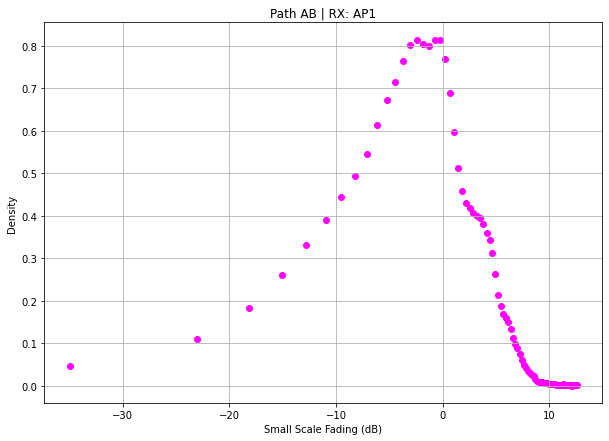

In [9]:
nAP = 'AP1'
estParameters_pathAB_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [10]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 1035)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 235)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP1

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 122.77853393554688 seconds.

Best Fitness: 1037.2545135424045
Best Gen: 133
Kappa: 0.22414002383110612
Mu: 1.0974595561660063
R_hat: 1.2085908225206505
Ms: 3.2097030987682786
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 4.764143466949463 seconds.

Best Fitness: 235.59856291504272
Best Gen: 16
Kappa: 0.30935981994126505
Mu: 0.9849115539102145
R_hat: 1.1547759820125665
Ms: 9.579661921816996


#### Estimated Parameters

In [11]:
mle_sku_t2_pathAB_ap1 = [0.3756, 0.98912, 1.2589, 2.1224]

estParameters_pathAB_ap1['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathAB_ap1
estParameters_pathAB_ap1['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathAB_ap1['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathAB_ap1 = estParameters_pathAB_ap1.set_index(index)
estParameters_pathAB_ap1

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.37560,0.224140,0.309360
mu,0.98912,1.097460,0.984912
r_hat,1.25890,1.208591,1.154776
ms,2.12240,3.209703,9.579662


#### Plots

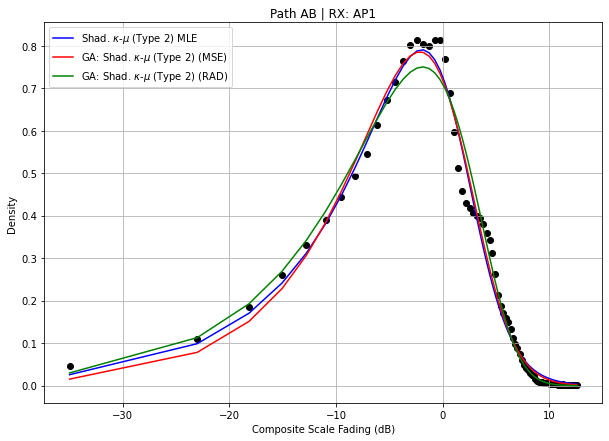

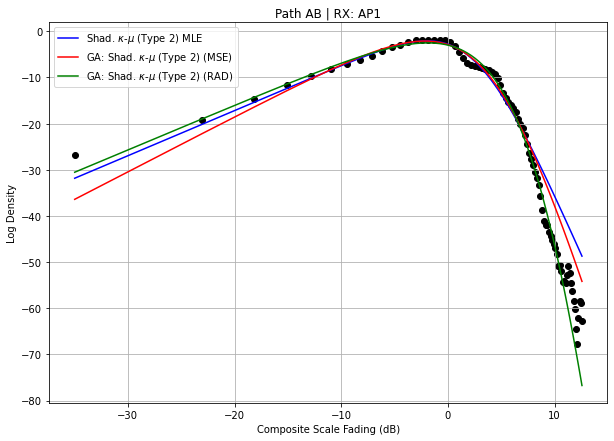

In [12]:
sku_t2_AB_ap1_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathAB_ap1[0], mle_sku_t2_pathAB_ap1[1], mle_sku_t2_pathAB_ap1[2], mle_sku_t2_pathAB_ap1[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_AB_ap1_pdf,\
     estParameters_pathAB_ap1['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathAB_ap1['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [13]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap1 = computeAIC(data, n, K,\
                            mle_sku_t2_pathAB_ap1,\
                            estParameters_pathAB_ap1['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathAB_ap1['GA: Shad. KappaMu T2 - RAD'])

Path: AB
RX: AP1


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),31915.005724
1,GA - Shad. KappaMu T2 (Fitness = MSE),32138.162178
2,MLE - Shad. KappaMu T2,32375.976836


### AP 2

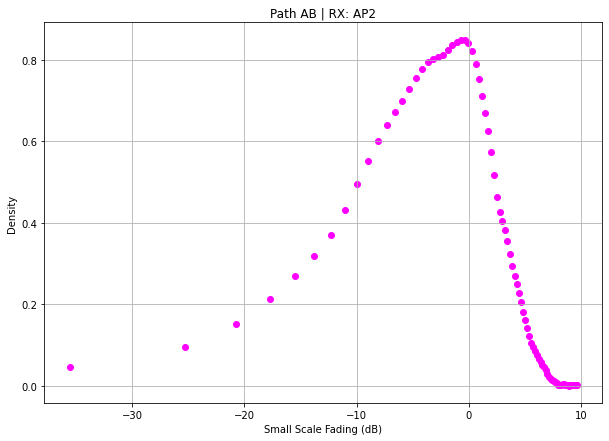

In [14]:
nAP = 'AP2'
estParameters_pathAB_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [15]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 3500)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 1100)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 9.344638347625732 seconds.

Best Fitness: 3507.7940724175023
Best Gen: 35
Kappa: 0.9339309628368739
Mu: 0.9205630685488378
R_hat: 1.0299649721017574
Ms: 10.680329720906416
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 96.8921971321106 seconds.

Best Fitness: 1102.458274094083
Best Gen: 126
Kappa: 0.8580804798489727
Mu: 0.9455064316950478
R_hat: 1.0275904773439852
Ms: 17.361870372536835


#### Estimated Parameters

In [16]:
mle_sku_t2_pathAB_ap2 = [0.904, 0.93062, 1.0302, 11.861]

estParameters_pathAB_ap2['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathAB_ap2
estParameters_pathAB_ap2['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathAB_ap2['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathAB_ap2 = estParameters_pathAB_ap2.set_index(index)
estParameters_pathAB_ap2

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.90400,0.933931,0.858080
mu,0.93062,0.920563,0.945506
r_hat,1.03020,1.029965,1.027590
ms,11.86100,10.680330,17.361870


#### Plots

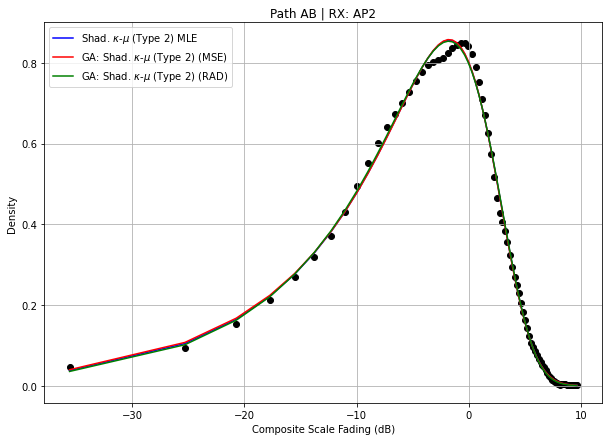

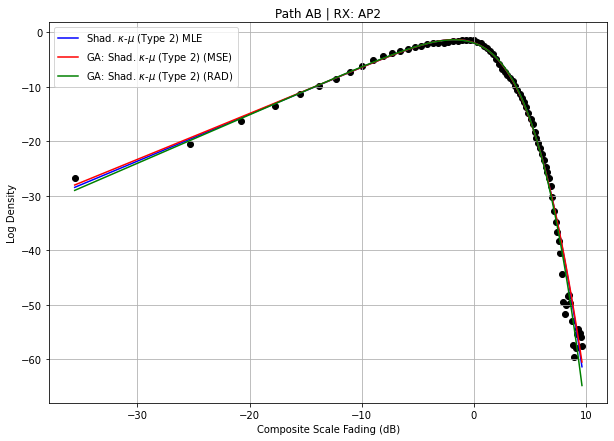

In [17]:
sku_t2_AB_ap2_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathAB_ap2[0], mle_sku_t2_pathAB_ap2[1], mle_sku_t2_pathAB_ap2[2], mle_sku_t2_pathAB_ap2[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_AB_ap2_pdf,\
     estParameters_pathAB_ap2['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathAB_ap2['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [18]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap2 = computeAIC(data, n, K,\
                            mle_sku_t2_pathAB_ap2,\
                            estParameters_pathAB_ap2['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathAB_ap2['GA: Shad. KappaMu T2 - RAD'])

Path: AB
RX: AP2


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),20801.179776
1,MLE - Shad. KappaMu T2,20808.625133
2,GA - Shad. KappaMu T2 (Fitness = MSE),20813.210253


### AP 3

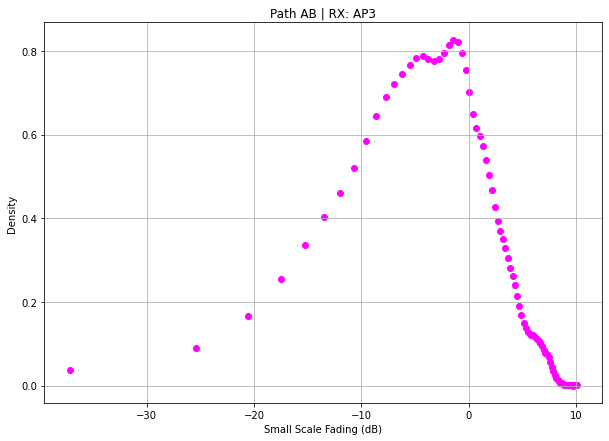

In [19]:
nAP = 'AP3'
estParameters_pathAB_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [20]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 3030)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 203)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP3

Satisfactory Threshold reached!
Elapsed time is 11.27650499343872 seconds.

Best Fitness: 3030.919944476796
Best Gen: 44
Kappa: 0.21825765078094056
Mu: 0.9917249304510402
R_hat: 1.0920682469237701
Ms: 4.139303662247699
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 85.13736963272095 seconds.

Best Fitness: 203.22765743395627
Best Gen: 64
Kappa: 0.1804603660357875
Mu: 0.9689129845426976
R_hat: 1.0605667739307911
Ms: 11.797275109150588


#### Estimated Parameters

In [21]:
mle_sku_t2_pathAB_ap3 = [0.24706, 0.98255, 1.0953, 3.8411]

estParameters_pathAB_ap3['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathAB_ap3
estParameters_pathAB_ap3['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathAB_ap3['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathAB_ap3 = estParameters_pathAB_ap3.set_index(index)
estParameters_pathAB_ap3

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.24706,0.218258,0.180460
mu,0.98255,0.991725,0.968913
r_hat,1.09530,1.092068,1.060567
ms,3.84110,4.139304,11.797275


#### Plots

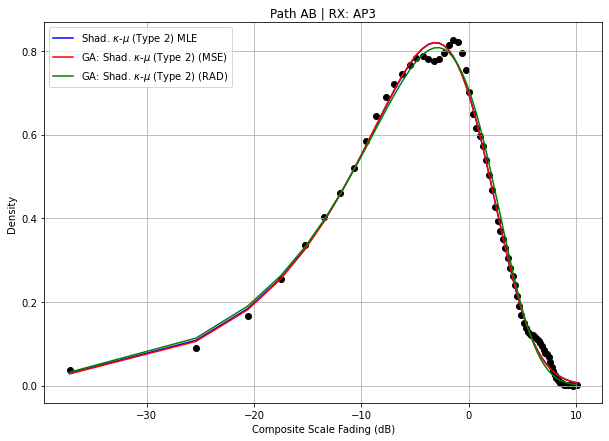

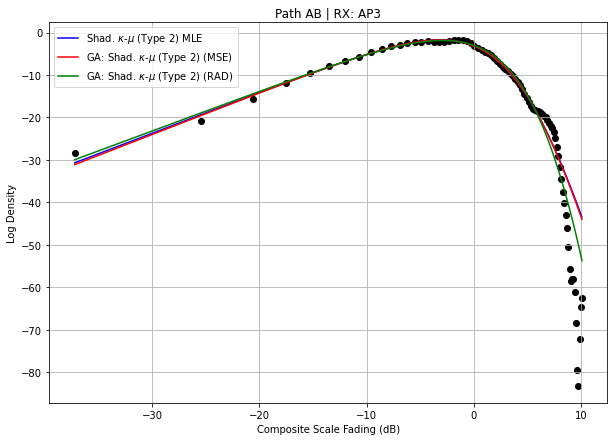

In [22]:
sku_t2_AB_ap3_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathAB_ap3[0], mle_sku_t2_pathAB_ap3[1], mle_sku_t2_pathAB_ap3[2], mle_sku_t2_pathAB_ap3[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_AB_ap3_pdf,\
     estParameters_pathAB_ap3['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathAB_ap3['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [23]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap3 = computeAIC(data, n, K,\
                            mle_sku_t2_pathAB_ap3,\
                            estParameters_pathAB_ap3['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathAB_ap3['GA: Shad. KappaMu T2 - RAD'])

Path: AB
RX: AP3


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),28858.353024
1,GA - Shad. KappaMu T2 (Fitness = MSE),28984.881533
2,MLE - Shad. KappaMu T2,29010.641855


### AP 4

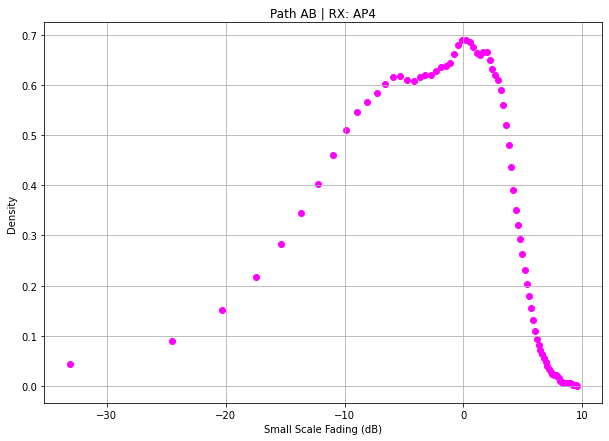

In [24]:
nAP = 'AP4'
estParameters_pathAB_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [25]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 560)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 190)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 34.18380928039551 seconds.

Best Fitness: 560.0200237288832
Best Gen: 106
Kappa: 1.1808165847004208
Mu: 0.7955168908805276
R_hat: 1.1567027765767086
Ms: 109.62184029079317
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 26.53461980819702 seconds.

Best Fitness: 190.01023109867936
Best Gen: 73
Kappa: 1.2231881860506935
Mu: 0.833387454720109
R_hat: 1.1298211401014329
Ms: 101.24986214542682


#### Estimated Parameters

In [26]:
mle_sku_t2_pathAB_ap4 = [1.1917, 0.7924, 1.1573, 100]

estParameters_pathAB_ap4['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathAB_ap4
estParameters_pathAB_ap4['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathAB_ap4['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathAB_ap4 = estParameters_pathAB_ap4.set_index(index)
estParameters_pathAB_ap4

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,1.1917,1.180817,1.223188
mu,0.7924,0.795517,0.833387
r_hat,1.1573,1.156703,1.129821
ms,100.0000,109.621840,101.249862


#### Plots

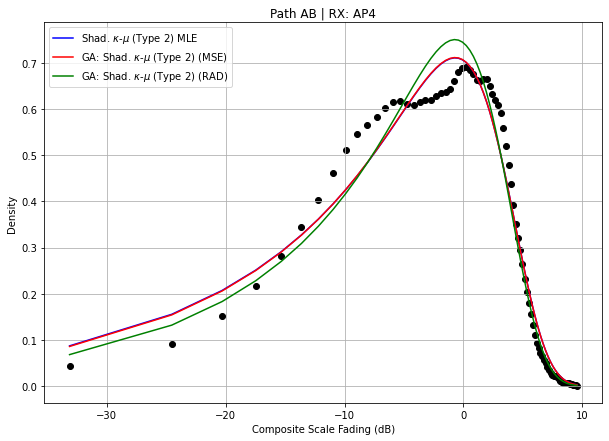

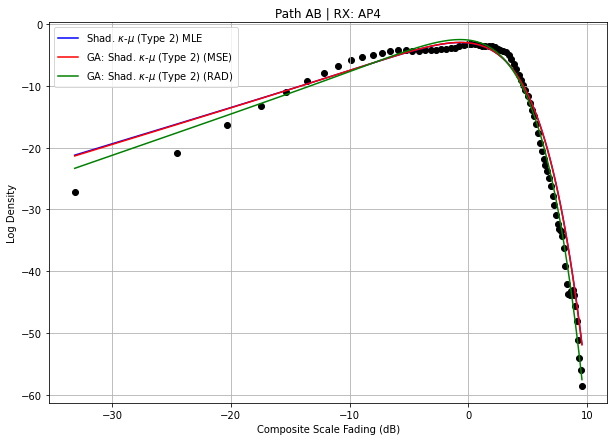

In [27]:
sku_t2_AB_ap4_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathAB_ap4[0], mle_sku_t2_pathAB_ap4[1], mle_sku_t2_pathAB_ap4[2], mle_sku_t2_pathAB_ap4[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_AB_ap4_pdf,\
     estParameters_pathAB_ap4['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathAB_ap4['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [28]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap4 = computeAIC(data, n, K,\
                            mle_sku_t2_pathAB_ap4,\
                            estParameters_pathAB_ap4['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathAB_ap4['GA: Shad. KappaMu T2 - RAD'])

Path: AB
RX: AP4


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),27622.079214
1,GA - Shad. KappaMu T2 (Fitness = MSE),27742.371524
2,MLE - Shad. KappaMu T2,27748.545650


### AP 5

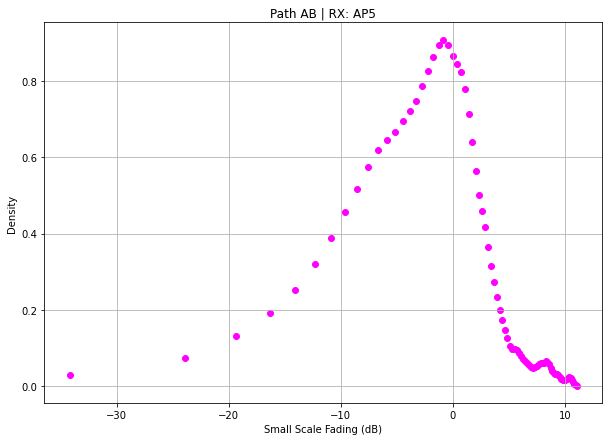

In [29]:
nAP = 'AP5'
estParameters_pathAB_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [30]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 980)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 140)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 19.76085615158081 seconds.

Best Fitness: 980.4803169656018
Best Gen: 79
Kappa: 1.1782081856750164
Mu: 0.822873600689158
R_hat: 1.0910713761545485
Ms: 2.639661821627581
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 20.125760793685913 seconds.

Best Fitness: 140.6287751695326
Best Gen: 88
Kappa: 0.5162470790970426
Mu: 0.8933649142210037
R_hat: 1.296460270037455
Ms: 1.463327101234777


#### Estimated Parameters

In [31]:
mle_sku_t2_pathAB_ap5 = [1.1036, 0.79967, 1.1183, 2.1831]

estParameters_pathAB_ap5['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathAB_ap5
estParameters_pathAB_ap5['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathAB_ap5['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathAB_ap5 = estParameters_pathAB_ap5.set_index(index)
estParameters_pathAB_ap5

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,1.10360,1.178208,0.516247
mu,0.79967,0.822874,0.893365
r_hat,1.11830,1.091071,1.296460
ms,2.18310,2.639662,1.463327


#### Plots

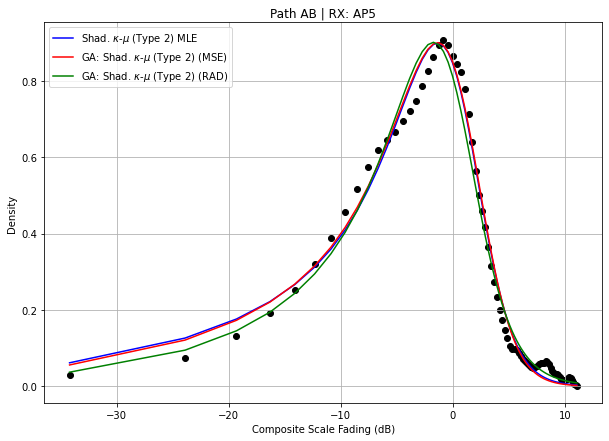

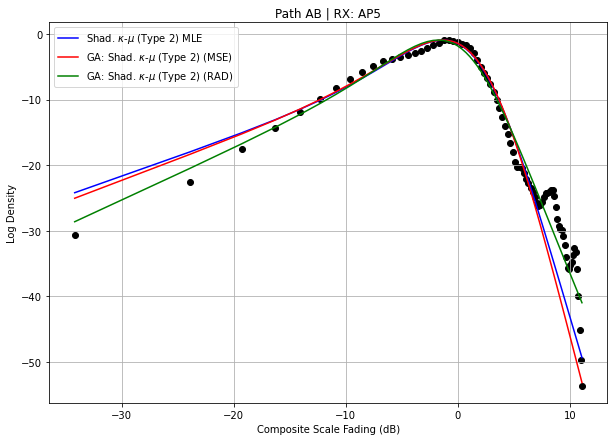

In [32]:
sku_t2_AB_ap5_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathAB_ap5[0], mle_sku_t2_pathAB_ap5[1], mle_sku_t2_pathAB_ap5[2], mle_sku_t2_pathAB_ap5[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_AB_ap5_pdf,\
     estParameters_pathAB_ap5['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathAB_ap5['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [33]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap5 = computeAIC(data, n, K,\
                            mle_sku_t2_pathAB_ap5,\
                            estParameters_pathAB_ap5['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathAB_ap5['GA: Shad. KappaMu T2 - RAD'])

Path: AB
RX: AP5


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),26987.411130
1,MLE - Shad. KappaMu T2,27076.569704
2,GA - Shad. KappaMu T2 (Fitness = MSE),27252.326277


### AP 6

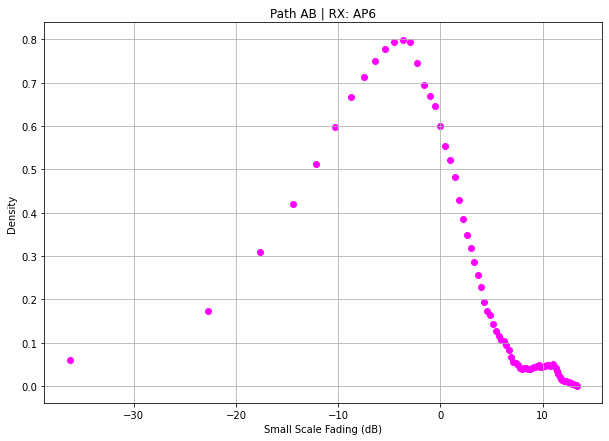

In [34]:
nAP = 'AP6'
estParameters_pathAB_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [35]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 4757)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 139)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 20.31532573699951 seconds.

Best Fitness: 4811.32858507837
Best Gen: 80
Kappa: 0.11627822469349872
Mu: 0.9057336073048015
R_hat: 1.4458955974344023
Ms: 1.4553529756577706
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 21.23617196083069 seconds.

Best Fitness: 139.4542096110983
Best Gen: 112
Kappa: 0.05451579646474572
Mu: 0.8990082090689863
R_hat: 2.1671667569955733
Ms: 1.1330102136671214


#### Estimated Parameters

In [36]:
mle_sku_t2_pathAB_ap6 = [0.10162, 0.90555, 1.5753, 1.3316]

estParameters_pathAB_ap6['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathAB_ap6
estParameters_pathAB_ap6['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathAB_ap6['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathAB_ap6 = estParameters_pathAB_ap6.set_index(index)
estParameters_pathAB_ap6

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.10162,0.116278,0.054516
mu,0.90555,0.905734,0.899008
r_hat,1.57530,1.445896,2.167167
ms,1.33160,1.455353,1.133010


#### Plots

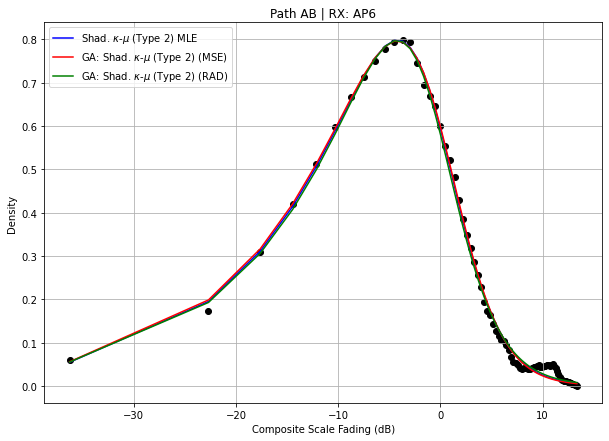

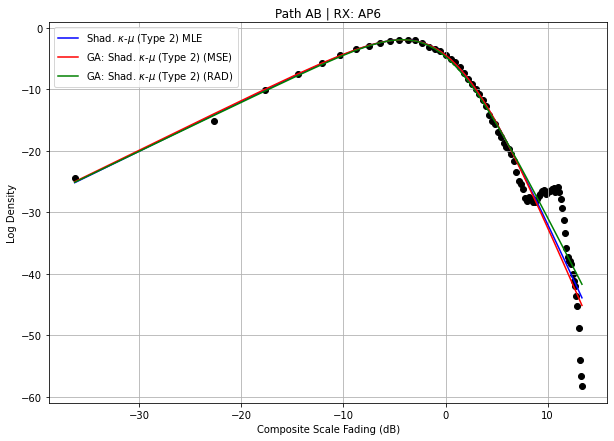

In [37]:
sku_t2_AB_ap6_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathAB_ap6[0], mle_sku_t2_pathAB_ap6[1], mle_sku_t2_pathAB_ap6[2], mle_sku_t2_pathAB_ap6[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_AB_ap6_pdf,\
     estParameters_pathAB_ap6['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathAB_ap6['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [38]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap6 = computeAIC(data, n, K,\
                            mle_sku_t2_pathAB_ap6,\
                            estParameters_pathAB_ap6['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathAB_ap6['GA: Shad. KappaMu T2 - RAD'])

Path: AB
RX: AP6


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = MSE),31200.795315
1,MLE - Shad. KappaMu T2,31222.995172
2,GA - Shad. KappaMu T2 (Fitness = RAD),31349.931962


### AP 7

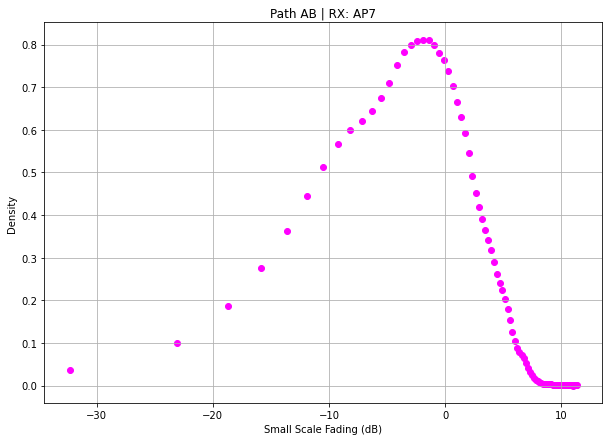

In [39]:
nAP = 'AP7'
estParameters_pathAB_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [40]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 4646)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 717)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 7.826292991638184 seconds.

Best Fitness: 4649.131026771902
Best Gen: 26
Kappa: 0.3238497457056953
Mu: 0.9848328939322428
R_hat: 1.0694215458928003
Ms: 47.14537754574427
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 67.67205095291138 seconds.

Best Fitness: 734.9381055674221
Best Gen: 7
Kappa: 0.46133222639536997
Mu: 0.9540583794896345
R_hat: 1.06322641745714
Ms: 71.68555112565288


#### Estimated Parameters

In [41]:
mle_sku_t2_pathAB_ap7 = [0.44129, 0.96827, 1.0736, 13.172]

estParameters_pathAB_ap7['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathAB_ap7
estParameters_pathAB_ap7['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathAB_ap7['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathAB_ap7 = estParameters_pathAB_ap7.set_index(index)
estParameters_pathAB_ap7

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.44129,0.323850,0.461332
mu,0.96827,0.984833,0.954058
r_hat,1.07360,1.069422,1.063226
ms,13.17200,47.145378,71.685551


#### Plots

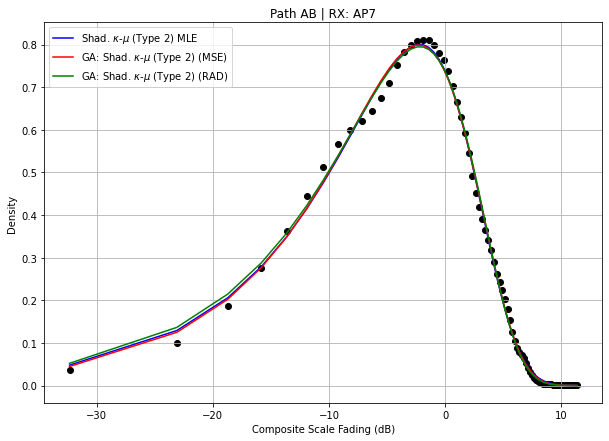

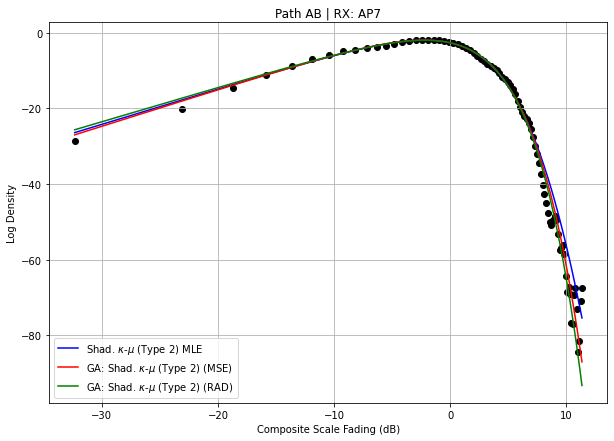

In [42]:
sku_t2_AB_ap7_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathAB_ap7[0], mle_sku_t2_pathAB_ap7[1], mle_sku_t2_pathAB_ap7[2], mle_sku_t2_pathAB_ap7[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_AB_ap7_pdf,\
     estParameters_pathAB_ap7['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathAB_ap7['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [43]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap7 = computeAIC(data, n, K,\
                            mle_sku_t2_pathAB_ap7,\
                            estParameters_pathAB_ap7['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathAB_ap7['GA: Shad. KappaMu T2 - RAD'])

Path: AB
RX: AP7


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = MSE),24158.624376
1,GA - Shad. KappaMu T2 (Fitness = RAD),24167.835263
2,MLE - Shad. KappaMu T2,24191.273229


### AP 8

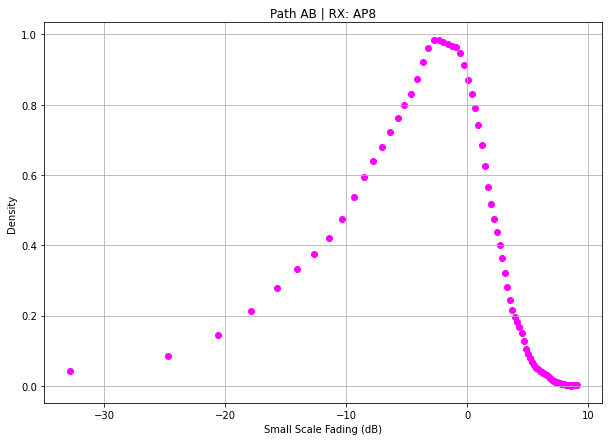

In [44]:
nAP = 'AP8'
estParameters_pathAB_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [45]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 7905)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 2167)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP8

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 88.11193585395813 seconds.

Best Fitness: 7915.267841577356
Best Gen: 63
Kappa: 1.3457818046600893
Mu: 0.8926816339454781
R_hat: 0.9525288500959551
Ms: 6.738624290180794
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP8

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 127.18422484397888 seconds.

Best Fitness: 2167.4503265748217
Best Gen: 94
Kappa: 1.1561799446958567
Mu: 0.9385132706565625
R_hat: 0.9582551849089338
Ms: 6.064749513016907


#### Estimated Parameters

In [46]:
mle_sku_t2_pathAB_ap8 = [1.3531, 0.88497, 0.95529, 6.1168]

estParameters_pathAB_ap8['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathAB_ap8
estParameters_pathAB_ap8['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathAB_ap8['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathAB_ap8 = estParameters_pathAB_ap8.set_index(index)
estParameters_pathAB_ap8

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,1.35310,1.345782,1.156180
mu,0.88497,0.892682,0.938513
r_hat,0.95529,0.952529,0.958255
ms,6.11680,6.738624,6.064750


#### Plots

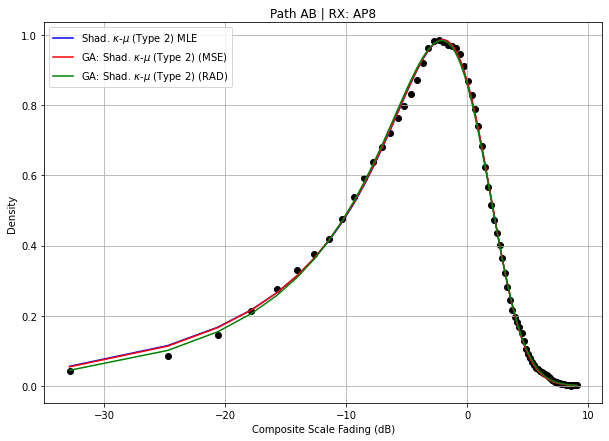

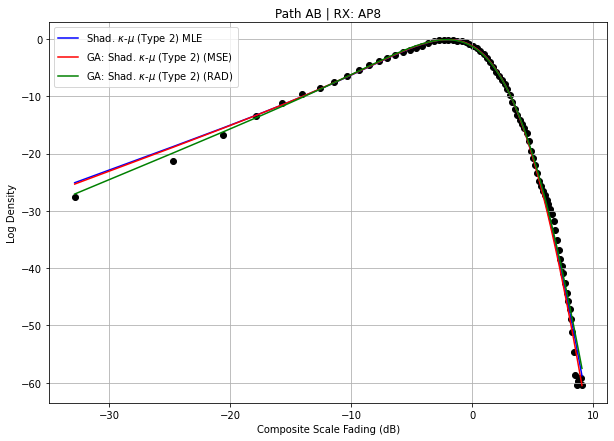

In [47]:
sku_t2_AB_ap8_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathAB_ap8[0], mle_sku_t2_pathAB_ap8[1], mle_sku_t2_pathAB_ap8[2], mle_sku_t2_pathAB_ap8[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_AB_ap8_pdf,\
     estParameters_pathAB_ap8['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathAB_ap8['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [48]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap8 = computeAIC(data, n, K,\
                            mle_sku_t2_pathAB_ap8,\
                            estParameters_pathAB_ap8['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathAB_ap8['GA: Shad. KappaMu T2 - RAD'])

Path: AB
RX: AP8


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),18088.095917
1,GA - Shad. KappaMu T2 (Fitness = MSE),18102.818522
2,MLE - Shad. KappaMu T2,18103.653071


### AP 9

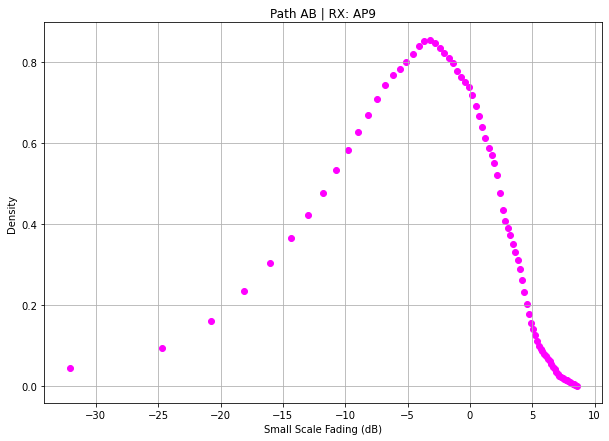

In [49]:
nAP = 'AP9'
estParameters_pathAB_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathAB_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [50]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 8228)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 2300)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: AB
RX: AP9

Satisfactory Threshold reached!
Elapsed time is 2.2622463703155518 seconds.

Best Fitness: 8238.556195740755
Best Gen: 6
Kappa: 0.12648594958410908
Mu: 0.9903959758723538
R_hat: 1.0166323302967575
Ms: 53.48812722116329
Genetic Algorithm Fitting
Fitness Type: RAD
Path: AB
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 146.3421506881714 seconds.

Best Fitness: 2300.9462973830796
Best Gen: 175
Kappa: 0.25745294801441637
Mu: 0.9994906177516604
R_hat: 1.010658209076505
Ms: 31.583946188461727


#### Estimated Parameters

In [51]:
mle_sku_t2_pathAB_ap9 = [0.13986, 0.98986, 1.0131, 100]

estParameters_pathAB_ap9['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathAB_ap9
estParameters_pathAB_ap9['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathAB_ap9['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathAB_ap9 = estParameters_pathAB_ap9.set_index(index)
estParameters_pathAB_ap9

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.13986,0.126486,0.257453
mu,0.98986,0.990396,0.999491
r_hat,1.01310,1.016632,1.010658
ms,100.00000,53.488127,31.583946


#### Plots

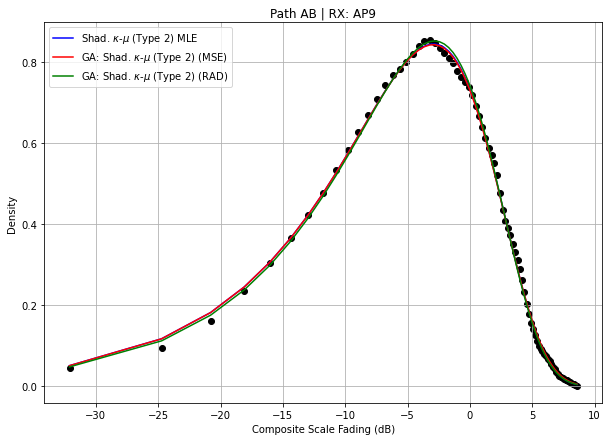

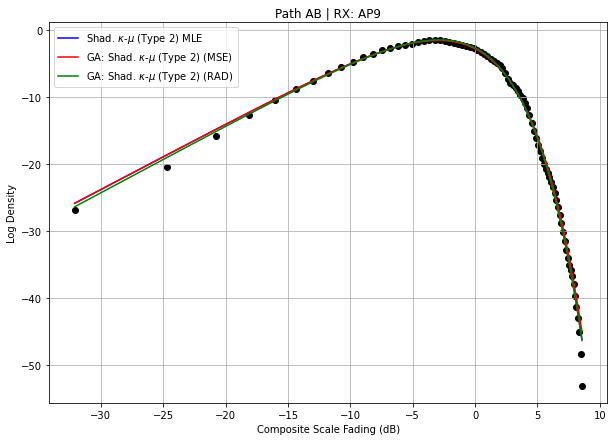

In [52]:
sku_t2_AB_ap9_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathAB_ap9[0], mle_sku_t2_pathAB_ap9[1], mle_sku_t2_pathAB_ap9[2], mle_sku_t2_pathAB_ap9[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_AB_ap9_pdf,\
     estParameters_pathAB_ap9['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathAB_ap9['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [53]:
## AIC Analysis
data = composite_pathAB_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathAB_ap9 = computeAIC(data, n, K,\
                            mle_sku_t2_pathAB_ap9,\
                            estParameters_pathAB_ap9['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathAB_ap9['GA: Shad. KappaMu T2 - RAD'])

Path: AB
RX: AP9


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),21673.947650
1,MLE - Shad. KappaMu T2,21679.380222
2,GA - Shad. KappaMu T2 (Fitness = MSE),21690.954859


## Shadowed $\kappa$-$\mu$ (type 2) - Path: BA

In [54]:
path = 'BA'

### AP 1

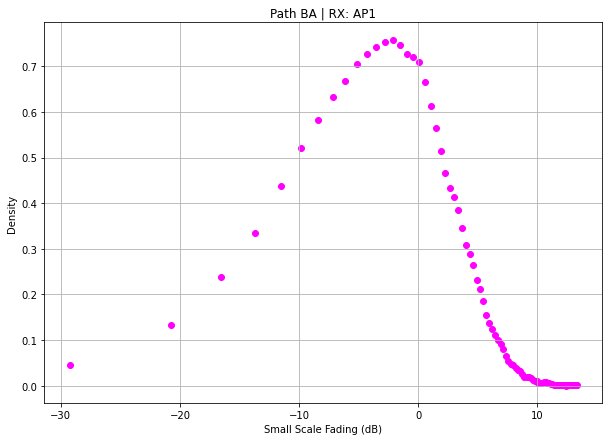

In [55]:
nAP = 'AP1'
estParameters_pathBA_ap1 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [56]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 14000)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 1839)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP1

Satisfactory Threshold reached!
Elapsed time is 6.561976671218872 seconds.

Best Fitness: 14001.113333301466
Best Gen: 23
Kappa: 0.05914533105851823
Mu: 1.0106954275656417
R_hat: 1.1649693048288972
Ms: 5.731108526824558
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP1

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 284.161080121994 seconds.

Best Fitness: 1840.45869244484
Best Gen: 149
Kappa: 0.07202903146510826
Mu: 1.027270555352536
R_hat: 1.1666372938316958
Ms: 5.401406150324009


#### Estimated Parameters

In [57]:
mle_sku_t2_pathBA_ap1 = [0.001, 1.0186, 1.1659, 6.1614]

estParameters_pathBA_ap1['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathBA_ap1
estParameters_pathBA_ap1['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathBA_ap1['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathBA_ap1 = estParameters_pathBA_ap1.set_index(index)
estParameters_pathBA_ap1

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.0010,0.059145,0.072029
mu,1.0186,1.010695,1.027271
r_hat,1.1659,1.164969,1.166637
ms,6.1614,5.731109,5.401406


#### Plots

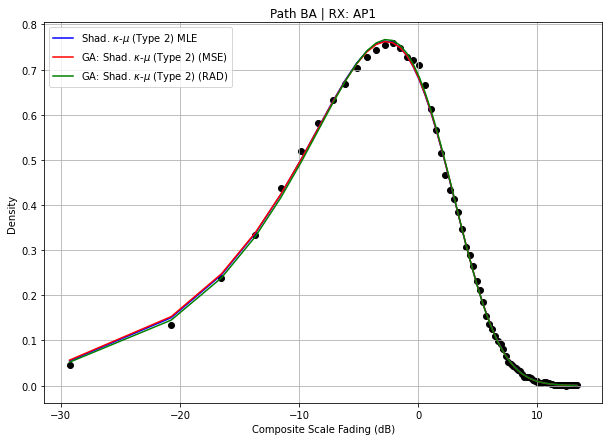

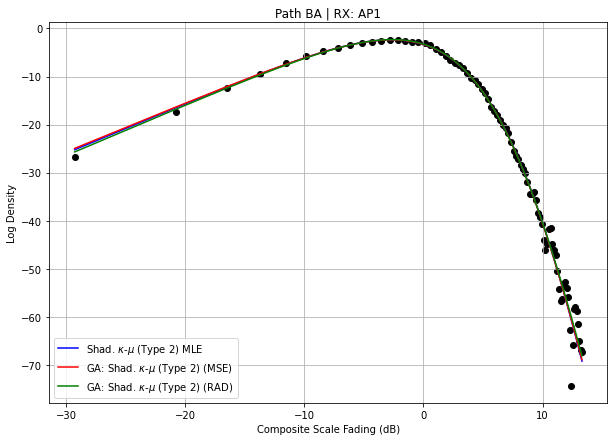

In [58]:
sku_t2_BA_ap1_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathBA_ap1[0], mle_sku_t2_pathBA_ap1[1], mle_sku_t2_pathBA_ap1[2], mle_sku_t2_pathBA_ap1[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_BA_ap1_pdf,\
     estParameters_pathBA_ap1['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathBA_ap1['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [59]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap1 = computeAIC(data, n, K,\
                            mle_sku_t2_pathBA_ap1,\
                            estParameters_pathBA_ap1['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathBA_ap1['GA: Shad. KappaMu T2 - RAD'])

Path: BA
RX: AP1


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),32030.124597
1,MLE - Shad. KappaMu T2,32032.794426
2,GA - Shad. KappaMu T2 (Fitness = MSE),32036.758882


### AP 2

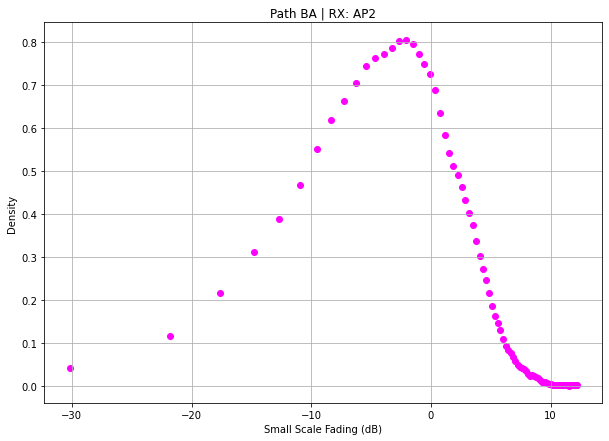

In [60]:
nAP = 'AP2'
estParameters_pathBA_ap2 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [61]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 12360)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 1368)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP2

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 52.65112614631653 seconds.

Best Fitness: 12408.7849146856
Best Gen: 13
Kappa: 0.013295602078891744
Mu: 1.024503610277354
R_hat: 1.0992035897393209
Ms: 9.456572810375674
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP2

Satisfactory Threshold reached!
Elapsed time is 41.670549154281616 seconds.

Best Fitness: 1368.6852312218539
Best Gen: 181
Kappa: 0.09410588471971164
Mu: 1.0395048384675578
R_hat: 1.0997111981697636
Ms: 7.666490462354923


#### Estimated Parameters

In [62]:
mle_sku_t2_pathBA_ap2 = [0.001, 1.0333, 1.1033, 8.5856]

estParameters_pathBA_ap2['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathBA_ap2
estParameters_pathBA_ap2['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathBA_ap2['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathBA_ap2 = estParameters_pathBA_ap2.set_index(index)
estParameters_pathBA_ap2

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.0010,0.013296,0.094106
mu,1.0333,1.024504,1.039505
r_hat,1.1033,1.099204,1.099711
ms,8.5856,9.456573,7.666490


#### Plots

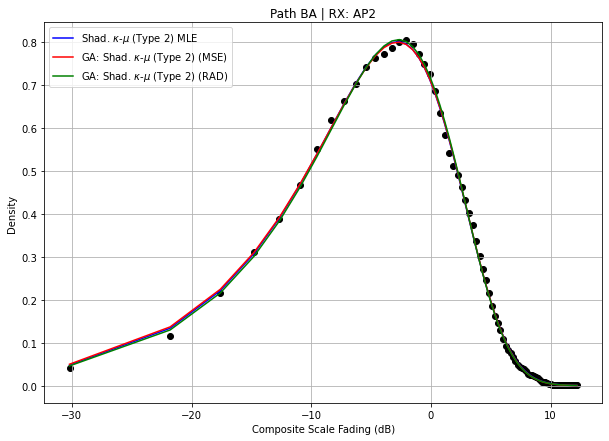

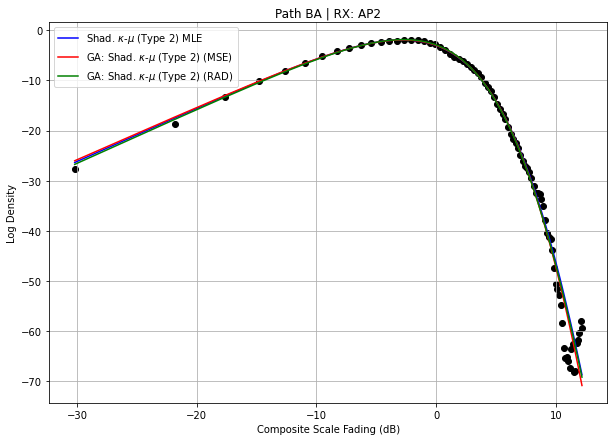

In [63]:
sku_t2_BA_ap2_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathBA_ap2[0], mle_sku_t2_pathBA_ap2[1], mle_sku_t2_pathBA_ap2[2], mle_sku_t2_pathBA_ap2[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_BA_ap2_pdf,\
     estParameters_pathBA_ap2['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathBA_ap2['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [64]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap2 = computeAIC(data, n, K,\
                            mle_sku_t2_pathBA_ap2,\
                            estParameters_pathBA_ap2['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathBA_ap2['GA: Shad. KappaMu T2 - RAD'])

Path: BA
RX: AP2


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),28435.372942
1,MLE - Shad. KappaMu T2,28439.039368
2,GA - Shad. KappaMu T2 (Fitness = MSE),28440.953439


### AP 3

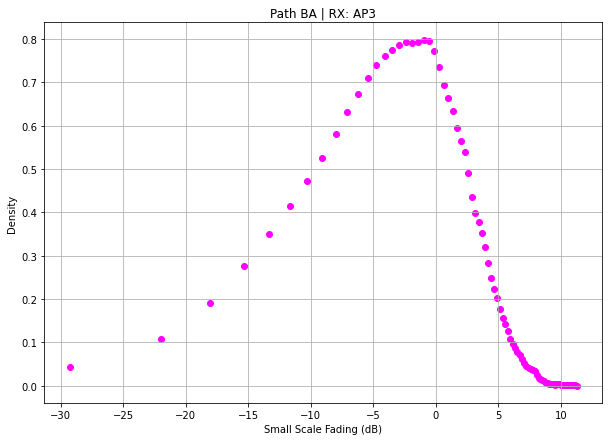

In [65]:
nAP = 'AP3'
estParameters_pathBA_ap3 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [66]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 19602)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 2233)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 110.02047419548035 seconds.

Best Fitness: 19609.262926674146
Best Gen: 177
Kappa: 0.4363458893052455
Mu: 0.9969220210012767
R_hat: 1.0880504020546637
Ms: 8.255192138756597
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP3

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of g

#### Estimated Parameters

In [67]:
mle_sku_t2_pathBA_ap3 = [0.43706, 0.99619, 1.0883, 8.1161]

estParameters_pathBA_ap3['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathBA_ap3
estParameters_pathBA_ap3['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathBA_ap3['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathBA_ap3 = estParameters_pathBA_ap3.set_index(index)
estParameters_pathBA_ap3

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.43706,0.436346,0.336754
mu,0.99619,0.996922,1.028174
r_hat,1.08830,1.088050,1.090264
ms,8.11610,8.255192,8.680587


#### Plots

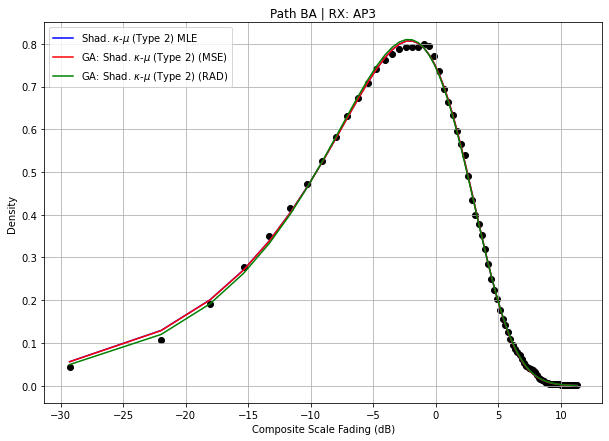

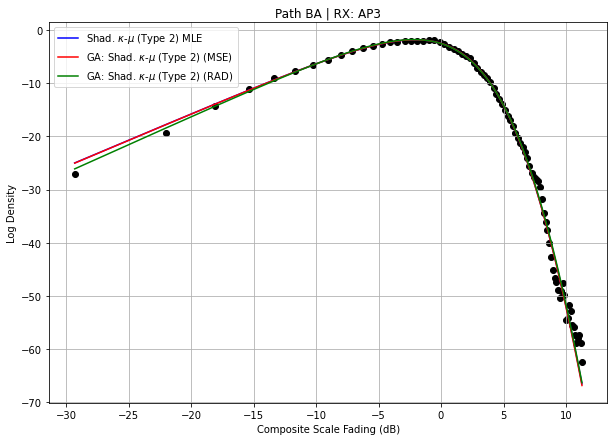

In [68]:
sku_t2_BA_ap3_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathBA_ap3[0], mle_sku_t2_pathBA_ap3[1], mle_sku_t2_pathBA_ap3[2], mle_sku_t2_pathBA_ap3[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_BA_ap3_pdf,\
     estParameters_pathBA_ap3['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathBA_ap3['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [69]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap3 = computeAIC(data, n, K,\
                            mle_sku_t2_pathBA_ap3,\
                            estParameters_pathBA_ap3['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathBA_ap3['GA: Shad. KappaMu T2 - RAD'])

Path: BA
RX: AP3


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),26125.168047
1,GA - Shad. KappaMu T2 (Fitness = MSE),26136.103850
2,MLE - Shad. KappaMu T2,26136.386316


### AP 4

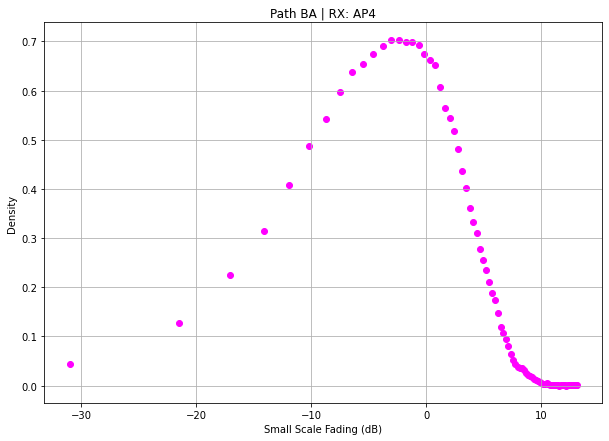

In [70]:
nAP = 'AP4'
estParameters_pathBA_ap4 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [71]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 12200)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 1232)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 45.7254273891449 seconds.

Best Fitness: 12217.90311140758
Best Gen: 170
Kappa: 0.12257474870616202
Mu: 0.940933475635081
R_hat: 1.1793541234344733
Ms: 13.03124125280454
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP4

Satisfactory Threshold reached!
Elapsed time is 33.0086407661438 seconds.

Best Fitness: 1236.398116212506
Best Gen: 129
Kappa: 0.22566080270547423
Mu: 0.953134696790784
R_hat: 1.1809718709721344
Ms: 9.380345579217165


#### Estimated Parameters

In [72]:
mle_sku_t2_pathBA_ap4 = [0.001, 0.94197, 1.1774, 18.913]

estParameters_pathBA_ap4['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathBA_ap4
estParameters_pathBA_ap4['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathBA_ap4['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathBA_ap4 = estParameters_pathBA_ap4.set_index(index)
estParameters_pathBA_ap4

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.00100,0.122575,0.225661
mu,0.94197,0.940933,0.953135
r_hat,1.17740,1.179354,1.180972
ms,18.91300,13.031241,9.380346


#### Plots

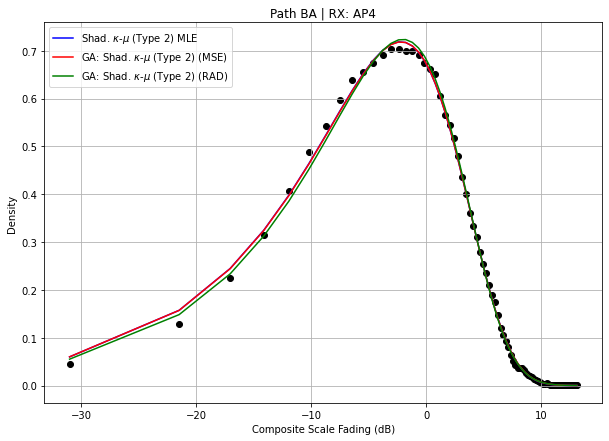

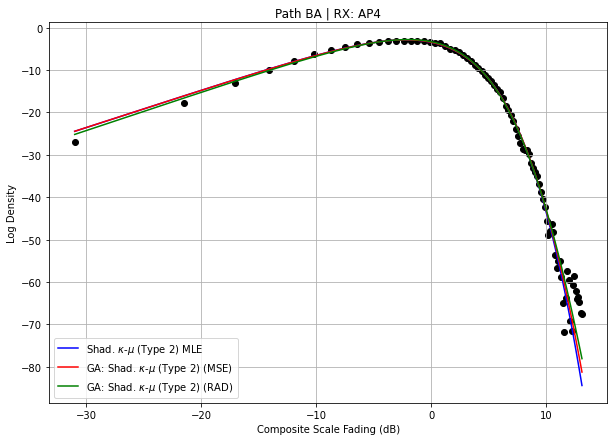

In [73]:
sku_t2_BA_ap4_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathBA_ap4[0], mle_sku_t2_pathBA_ap4[1], mle_sku_t2_pathBA_ap4[2], mle_sku_t2_pathBA_ap4[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_BA_ap4_pdf,\
     estParameters_pathBA_ap4['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathBA_ap4['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [74]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap4 = computeAIC(data, n, K,\
                            mle_sku_t2_pathBA_ap4,\
                            estParameters_pathBA_ap4['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathBA_ap4['GA: Shad. KappaMu T2 - RAD'])

Path: BA
RX: AP4


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),31819.775398
1,GA - Shad. KappaMu T2 (Fitness = MSE),31827.037422
2,MLE - Shad. KappaMu T2,31828.557757


### AP 5

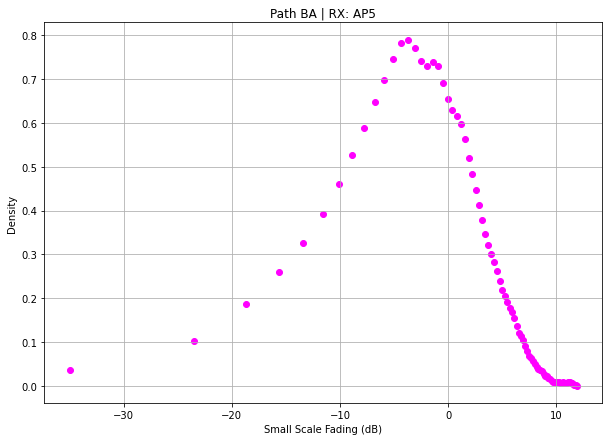

In [75]:
nAP = 'AP5'
estParameters_pathBA_ap5 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [76]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 8030)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 1004)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP5

Satisfactory Threshold reached!
Elapsed time is 38.141499042510986 seconds.

Best Fitness: 8030.194577829228
Best Gen: 159
Kappa: 0.026635653959002466
Mu: 1.0708289338863302
R_hat: 1.225370006663169
Ms: 3.5251260041135226
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP5

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of 

#### Estimated Parameters

In [77]:
mle_sku_t2_pathBA_ap5 = [0.001, 1.0746, 1.2232, 3.7207]

estParameters_pathBA_ap5['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathBA_ap5
estParameters_pathBA_ap5['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathBA_ap5['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathBA_ap5 = estParameters_pathBA_ap5.set_index(index)
estParameters_pathBA_ap5

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.0010,0.026636,0.046624
mu,1.0746,1.070829,1.023103
r_hat,1.2232,1.225370,1.199428
ms,3.7207,3.525126,4.519286


#### Plots

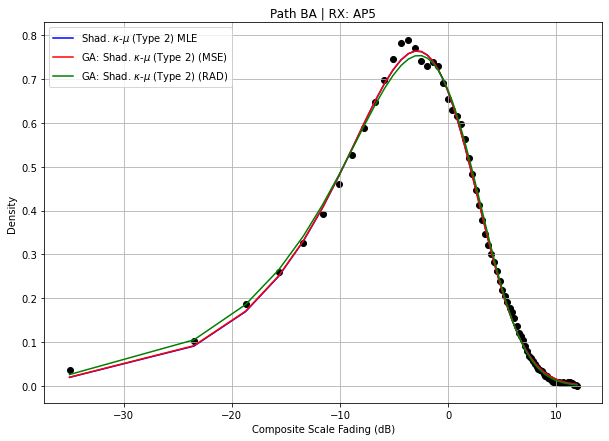

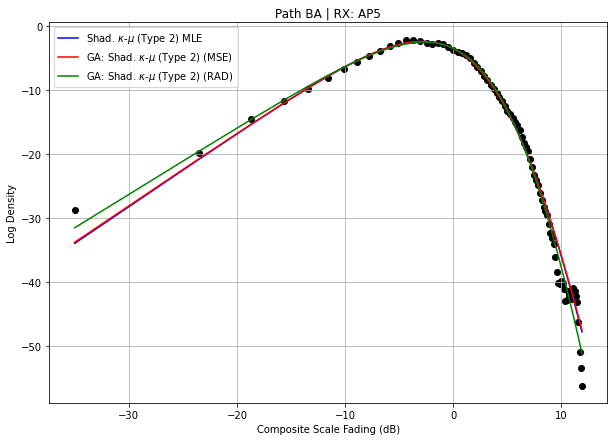

In [78]:
sku_t2_BA_ap5_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathBA_ap5[0], mle_sku_t2_pathBA_ap5[1], mle_sku_t2_pathBA_ap5[2], mle_sku_t2_pathBA_ap5[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_BA_ap5_pdf,\
     estParameters_pathBA_ap5['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathBA_ap5['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [79]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap5 = computeAIC(data, n, K,\
                            mle_sku_t2_pathBA_ap5,\
                            estParameters_pathBA_ap5['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathBA_ap5['GA: Shad. KappaMu T2 - RAD'])

Path: BA
RX: AP5


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),31361.832485
1,MLE - Shad. KappaMu T2,31408.050356
2,GA - Shad. KappaMu T2 (Fitness = MSE),31418.222630


### AP 6

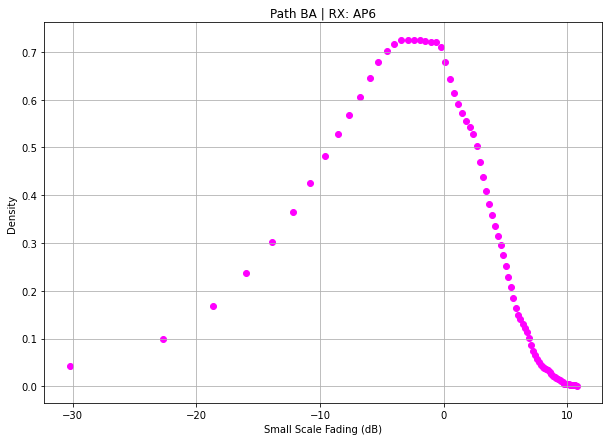

In [80]:
nAP = 'AP6'
estParameters_pathBA_ap6 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [81]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 12441)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 2391)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP6

Satisfactory Threshold reached!
Elapsed time is 38.219149351119995 seconds.

Best Fitness: 12448.505814871078
Best Gen: 146
Kappa: 0.10854181261856422
Mu: 0.9946045225823726
R_hat: 1.1867627168404193
Ms: 8.534098183795107
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP6

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 222.29168128967285 seconds.

Best Fitness: 2392.916246364177
Best Gen: 145
Kappa: 0.08432244101208902
Mu: 0.9935487832212655
R_hat: 1.1746911563350504
Ms: 14.119472370437457


#### Estimated Parameters

In [82]:
mle_sku_t2_pathBA_ap6 = [0.001, 0.99712, 1.1846, 11.178]

estParameters_pathBA_ap6['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathBA_ap6
estParameters_pathBA_ap6['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathBA_ap6['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathBA_ap6 = estParameters_pathBA_ap6.set_index(index)
estParameters_pathBA_ap6

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.00100,0.108542,0.084322
mu,0.99712,0.994605,0.993549
r_hat,1.18460,1.186763,1.174691
ms,11.17800,8.534098,14.119472


#### Plots

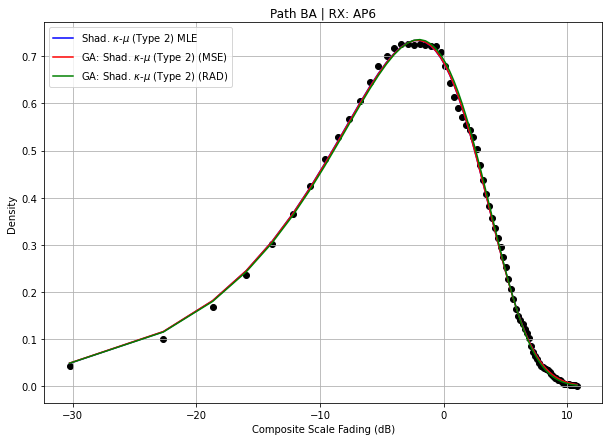

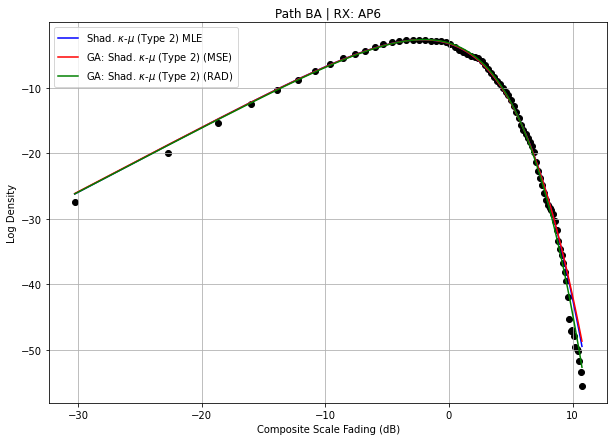

In [83]:
sku_t2_BA_ap6_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathBA_ap6[0], mle_sku_t2_pathBA_ap6[1], mle_sku_t2_pathBA_ap6[2], mle_sku_t2_pathBA_ap6[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_BA_ap6_pdf,\
     estParameters_pathBA_ap6['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathBA_ap6['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [84]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap6 = computeAIC(data, n, K,\
                            mle_sku_t2_pathBA_ap6,\
                            estParameters_pathBA_ap6['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathBA_ap6['GA: Shad. KappaMu T2 - RAD'])

Path: BA
RX: AP6


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),30893.493075
1,MLE - Shad. KappaMu T2,30920.587957
2,GA - Shad. KappaMu T2 (Fitness = MSE),30933.801035


### AP 7

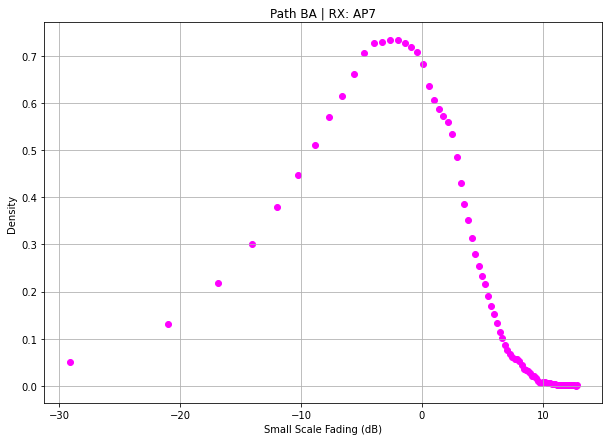

In [85]:
nAP = 'AP7'
estParameters_pathBA_ap7 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [86]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 12218)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 1854)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP7

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 145.08991599082947 seconds.

Best Fitness: 12228.50321052185
Best Gen: 122
Kappa: 0.14558138022529266
Mu: 0.9984619145495466
R_hat: 1.1762497339635074
Ms: 7.385800712999626
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP7

Satisfactory Threshold reached!
Elapsed time is 4.764159917831421 seconds.

Best Fitness: 1861.5419737653597
Best Gen: 17
Kappa: 0.06030724349689266
Mu: 1.0176686805997373
R_hat: 1.1822530698781557
Ms: 7.45972364837993


#### Estimated Parameters

In [87]:
mle_sku_t2_pathBA_ap7 = [0.11652, 1.0022, 1.1769, 7.8475]

estParameters_pathBA_ap7['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathBA_ap7
estParameters_pathBA_ap7['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathBA_ap7['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathBA_ap7 = estParameters_pathBA_ap7.set_index(index)
estParameters_pathBA_ap7

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.11652,0.145581,0.060307
mu,1.00220,0.998462,1.017669
r_hat,1.17690,1.176250,1.182253
ms,7.84750,7.385801,7.459724


#### Plots

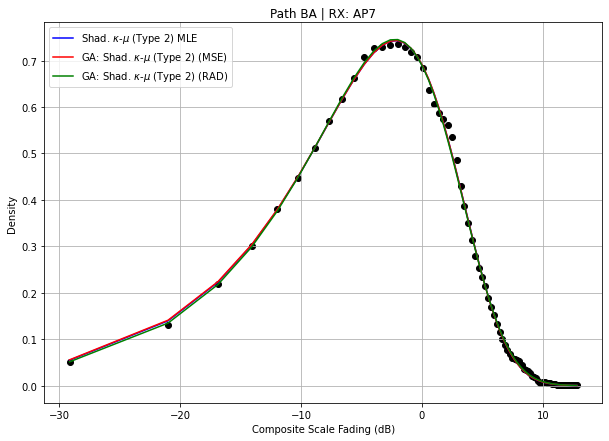

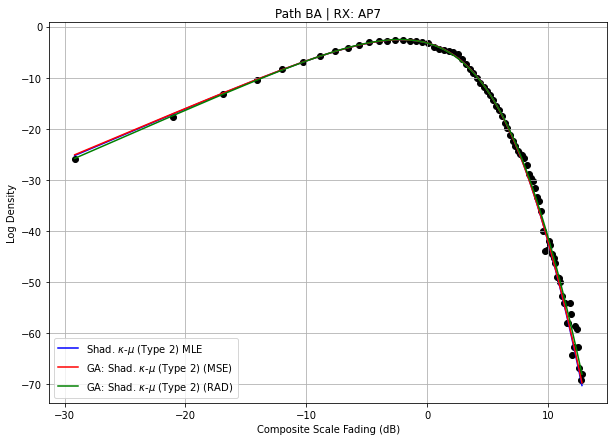

In [88]:
sku_t2_BA_ap7_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathBA_ap7[0], mle_sku_t2_pathBA_ap7[1], mle_sku_t2_pathBA_ap7[2], mle_sku_t2_pathBA_ap7[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_BA_ap7_pdf,\
     estParameters_pathBA_ap7['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathBA_ap7['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [89]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap7 = computeAIC(data, n, K,\
                            mle_sku_t2_pathBA_ap7,\
                            estParameters_pathBA_ap7['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathBA_ap7['GA: Shad. KappaMu T2 - RAD'])

Path: BA
RX: AP7


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),32306.608305
1,MLE - Shad. KappaMu T2,32312.056235
2,GA - Shad. KappaMu T2 (Fitness = MSE),32313.352565


### AP 8

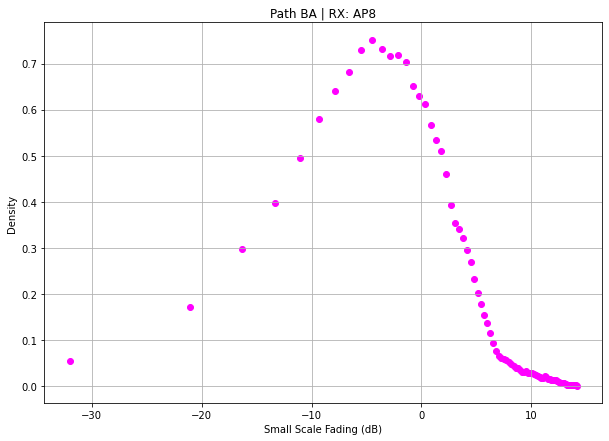

In [90]:
nAP = 'AP8'
estParameters_pathBA_ap8 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [91]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 7895)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 366)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 5.064209222793579 seconds.

Best Fitness: 7901.59808662962
Best Gen: 20
Kappa: 0.05723418849176544
Mu: 0.9397421920695771
R_hat: 1.2190052689123956
Ms: 3.4018235348612365
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP8

Satisfactory Threshold reached!
Elapsed time is 6.484745502471924 seconds.

Best Fitness: 368.01497444404976
Best Gen: 28
Kappa: 0.24485694755684959
Mu: 0.8829273484996266
R_hat: 1.3378676248323014
Ms: 1.7611106826031266


#### Estimated Parameters

In [92]:
mle_sku_t2_pathBA_ap8 = [0.025471, 0.96396, 1.2414, 3.069]

estParameters_pathBA_ap8['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathBA_ap8
estParameters_pathBA_ap8['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathBA_ap8['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathBA_ap8 = estParameters_pathBA_ap8.set_index(index)
estParameters_pathBA_ap8

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.025471,0.057234,0.244857
mu,0.963960,0.939742,0.882927
r_hat,1.241400,1.219005,1.337868
ms,3.069000,3.401824,1.761111


#### Plots

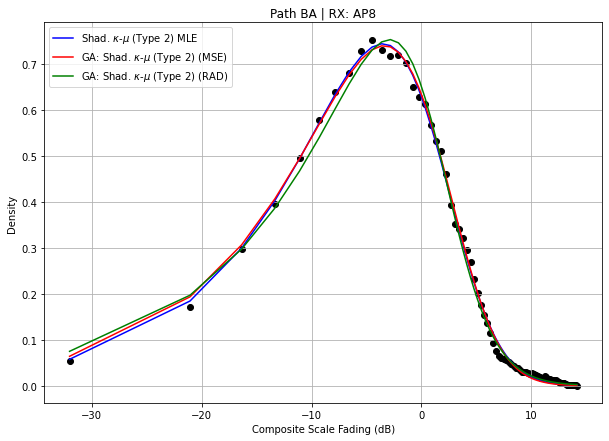

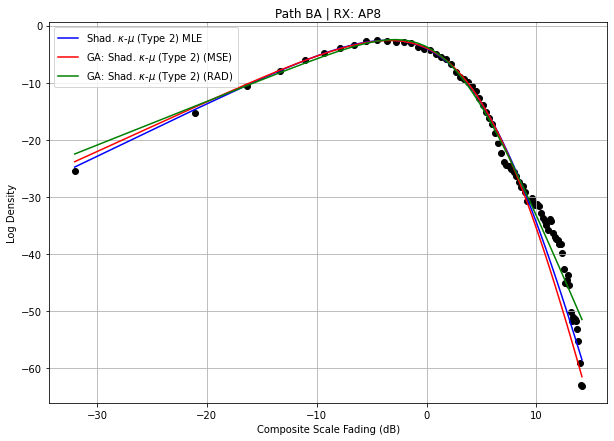

In [93]:
sku_t2_BA_ap8_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathBA_ap8[0], mle_sku_t2_pathBA_ap8[1], mle_sku_t2_pathBA_ap8[2], mle_sku_t2_pathBA_ap8[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_BA_ap8_pdf,\
     estParameters_pathBA_ap8['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathBA_ap8['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [94]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap8 = computeAIC(data, n, K,\
                            mle_sku_t2_pathBA_ap8,\
                            estParameters_pathBA_ap8['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathBA_ap8['GA: Shad. KappaMu T2 - RAD'])

Path: BA
RX: AP8


,Methods,Akaike Information Criteria
0,MLE - Shad. KappaMu T2,34900.641051
1,GA - Shad. KappaMu T2 (Fitness = RAD),34966.005109
2,GA - Shad. KappaMu T2 (Fitness = MSE),34975.234910


### AP 9

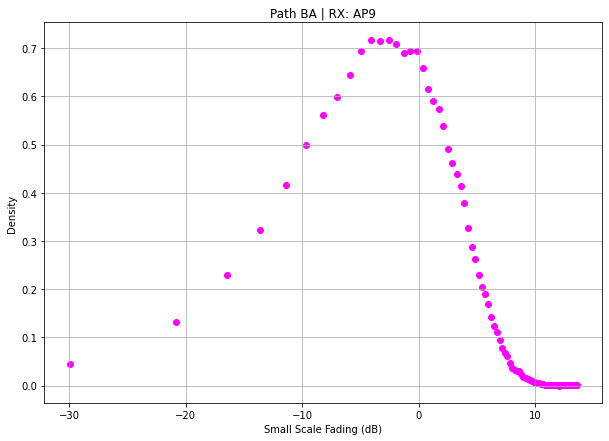

In [95]:
nAP = 'AP9'
estParameters_pathBA_ap9 = pd.DataFrame()
Xdata, Ydata = getDensityEstimationSamples(composite_pathBA_linear[nAP].dropna(), nExtractedSamples, path, nAP)

In [96]:
fitnessType = 'MSE'
printSummary(path, nAP, fitnessType)
kappa_mse, mu_mse, r_hat_mse, ms_mse = geneticAlgorithm_sku(Xdata, Ydata, 11652)

fitnessType = 'RAD'
printSummary(path, nAP, fitnessType)
kappa_rad, mu_rad, r_hat_rad, ms_rad = geneticAlgorithm_sku(Xdata, Ydata, 1535)

Genetic Algorithm Fitting
Fitness Type: MSE
Path: BA
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 104.2843177318573 seconds.

Best Fitness: 11662.592803388288
Best Gen: 12
Kappa: 0.03579979497559193
Mu: 0.9619147136284077
R_hat: 1.1808236597221362
Ms: 13.137400366232997
Genetic Algorithm Fitting
Fitness Type: RAD
Path: BA
RX: AP9

Max number of generations reached! (Possible bad initialization)
Restarting...

Satisfactory Threshold reached!
Elapsed time is 61.703572273254395 seconds.

Best Fitness: 1535.8049739204057
Best Gen: 69
Kappa: 0.06052343570351692
Mu: 0.9822462444817432
R_hat: 1.176407452545851
Ms: 13.290882696384664


#### Estimated Parameters

In [97]:
mle_sku_t2_pathBA_ap9 = [0.001, 0.96583, 1.1825, 13.2]

estParameters_pathBA_ap9['MLE - Shad. KappaMu T2'] = mle_sku_t2_pathBA_ap9
estParameters_pathBA_ap9['GA: Shad. KappaMu T2 - MSE'] = kappa_mse, mu_mse, r_hat_mse, ms_mse
estParameters_pathBA_ap9['GA: Shad. KappaMu T2 - RAD'] = kappa_rad, mu_rad, r_hat_rad, ms_rad

index = pd.Index(['kappa', 'mu', 'r_hat', 'ms'])
estParameters_pathBA_ap9 = estParameters_pathBA_ap9.set_index(index)
estParameters_pathBA_ap9

,MLE - Shad. KappaMu T2,GA: Shad. KappaMu T2 - MSE,GA: Shad. KappaMu T2 - RAD
kappa,0.00100,0.035800,0.060523
mu,0.96583,0.961915,0.982246
r_hat,1.18250,1.180824,1.176407
ms,13.20000,13.137400,13.290883


#### Plots

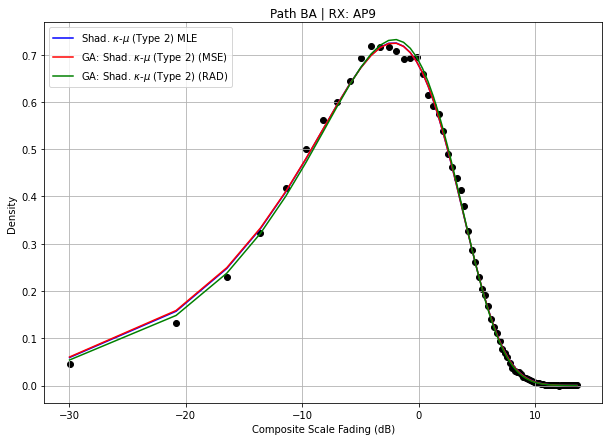

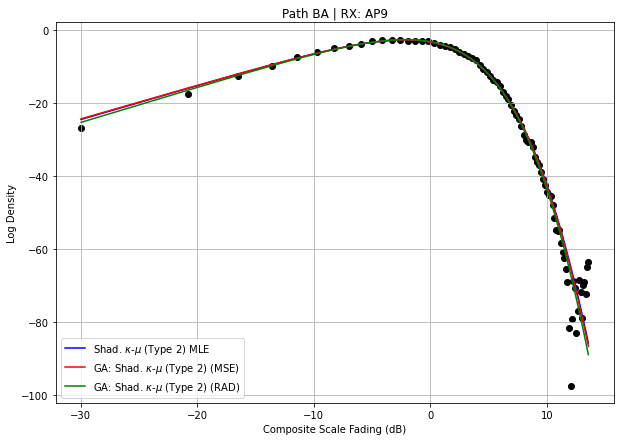

In [98]:
sku_t2_BA_ap9_pdf = shadowedKappaMuPDF_t2(Xdata, mle_sku_t2_pathBA_ap9[0], mle_sku_t2_pathBA_ap9[1], mle_sku_t2_pathBA_ap9[2], mle_sku_t2_pathBA_ap9[3])

plotResults(Xdata,\
     Ydata,\
     sku_t2_BA_ap9_pdf,\
     estParameters_pathBA_ap9['GA: Shad. KappaMu T2 - MSE'],\
     estParameters_pathBA_ap9['GA: Shad. KappaMu T2 - RAD'],\
     path,\
     nAP)

#### AIC Values

In [99]:
## AIC Analysis
data = composite_pathBA_linear[nAP].dropna()
n = len(data)
K = 4

print('Path: {}\nRX: {}'.format(path,nAP))

AIC_pathBA_ap9 = computeAIC(data, n, K,\
                            mle_sku_t2_pathBA_ap9,\
                            estParameters_pathBA_ap9['GA: Shad. KappaMu T2 - MSE'],\
                            estParameters_pathBA_ap9['GA: Shad. KappaMu T2 - RAD'])

Path: BA
RX: AP9


,Methods,Akaike Information Criteria
0,GA - Shad. KappaMu T2 (Fitness = RAD),31332.318237
1,MLE - Shad. KappaMu T2,31345.790695
2,GA - Shad. KappaMu T2 (Fitness = MSE),31346.368137
